# **Data Transformation**

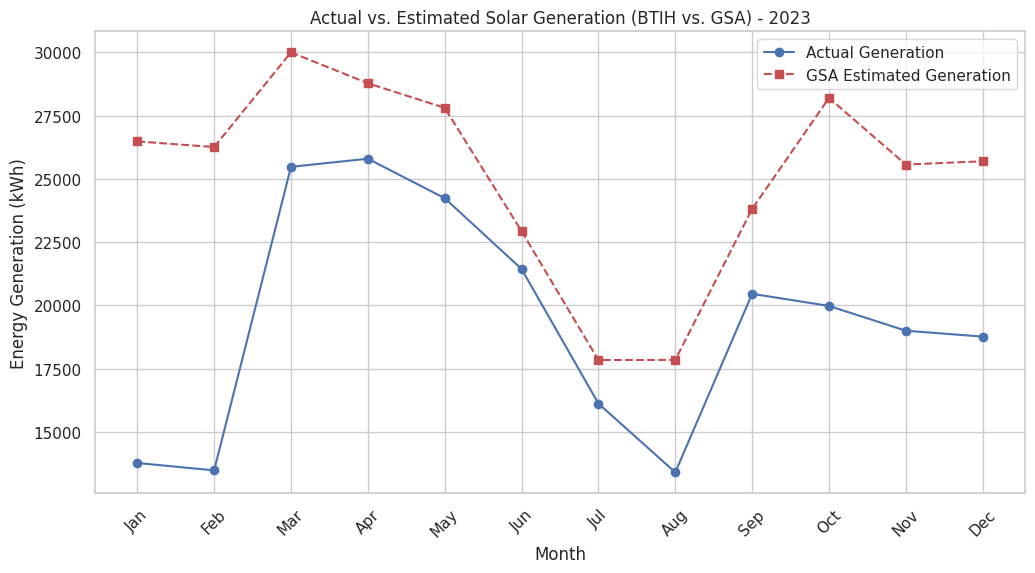

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
actual_generation = [13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768]
gsa_estimated = [26485, 26262, 30005, 28784, 27812, 22936, 17841, 17846, 23816, 28203, 25570, 25699]

df = pd.DataFrame({"Month": months, "Actual Generation (kWh)": actual_generation, "GSA Estimated (kWh)": gsa_estimated})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df["Month"], df["Actual Generation (kWh)"], marker='o', linestyle='-', color='b', label="Actual Generation")
plt.plot(df["Month"], df["GSA Estimated (kWh)"], marker='s', linestyle='--', color='r', label="GSA Estimated Generation")
plt.xlabel("Month")
plt.ylabel("Energy Generation (kWh)")
plt.title("Actual vs. Estimated Solar Generation (BTIH vs. GSA) - 2023")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


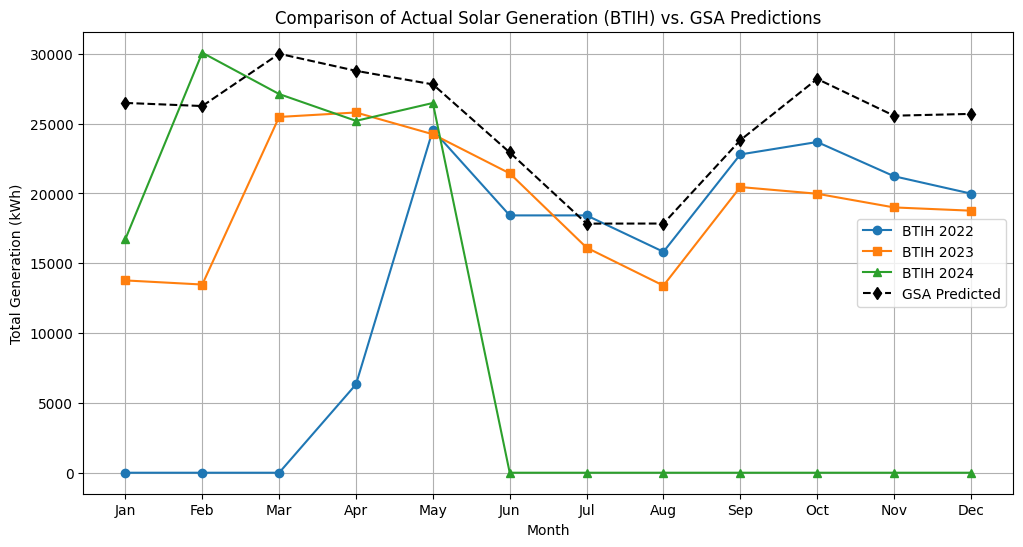

Percentage Deviation from GSA Predictions (2022):
Jan: -100.00%
Feb: -100.00%
Mar: -100.00%
Apr: -78.01%
May: -11.75%
Jun: -19.65%
Jul: 3.29%
Aug: -11.34%
Sep: -4.29%
Oct: -16.02%
Nov: -16.96%
Dec: -22.21%

Percentage Deviation from GSA Predictions (2023):
Jan: -48.00%
Feb: -48.68%
Mar: -15.08%
Apr: -10.37%
May: -12.84%
Jun: -6.52%
Jul: -9.65%
Aug: -24.91%
Sep: -14.09%
Oct: -29.16%
Nov: -25.69%
Dec: -26.97%

Percentage Deviation from GSA Predictions (2024):
Jan: -36.79%
Feb: 14.54%
Mar: -9.62%
Apr: -12.45%
May: -4.79%
Jun: -100.00%
Jul: -100.00%
Aug: -100.00%
Sep: -100.00%
Oct: -100.00%
Nov: -100.00%
Dec: -100.00%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

actual_generation = {
    "2022": [0, 0, 0, 6329, 24543, 18429, 18429, 15822, 22795, 23686, 21234, 19991],  # Jan-Mar set to 0
    "2023": [13772, 13478, 25480, 25800, 24240, 21440, 16120, 13400, 20460, 19980, 19000, 18768],  # Full Year
    "2024": [16740, 30080, 27120, 25200, 26480, 0, 0, 0, 0, 0, 0, 0]  # Jan-May data, rest 0
}

gsa_generation = [26484.6, 26262.4, 30005.3, 28783.7, 27812.1, 22936.2, 17841.3, 17846.2, 23816.3, 28203.3, 25569.6, 25699.4]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(12, 6))
plt.plot(months, actual_generation["2022"], marker='o', label="BTIH 2022")
plt.plot(months, actual_generation["2023"], marker='s', label="BTIH 2023")
plt.plot(months, actual_generation["2024"], marker='^', label="BTIH 2024")
plt.plot(months, gsa_generation, linestyle="--", marker="d", label="GSA Predicted", color='black')

plt.title("Comparison of Actual Solar Generation (BTIH) vs. GSA Predictions")
plt.xlabel("Month")
plt.ylabel("Total Generation (kWh)")
plt.legend()
plt.grid(True)

plt.show()

def calculate_deviation(actual, predicted):
    return [(a - p) / p * 100 if p > 0 else 0 for a, p in zip(actual, predicted)]

deviation_2022 = calculate_deviation(actual_generation["2022"], gsa_generation)
deviation_2023 = calculate_deviation(actual_generation["2023"], gsa_generation)
deviation_2024 = calculate_deviation(actual_generation["2024"], gsa_generation)
print("Percentage Deviation from GSA Predictions (2022):")
for month, dev in zip(months, deviation_2022):
    print(f"{month}: {dev:.2f}%")

print("\nPercentage Deviation from GSA Predictions (2023):")
for month, dev in zip(months, deviation_2023):
    print(f"{month}: {dev:.2f}%")

print("\nPercentage Deviation from GSA Predictions (2024):")
for month, dev in zip(months, deviation_2024):
    print(f"{month}: {dev:.2f}%")


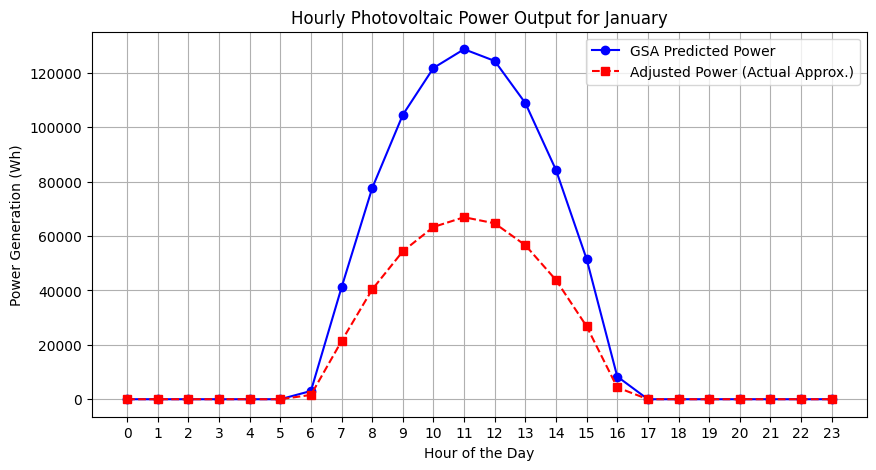

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
hours = np.arange(24)
gsa_predicted = [0, 0, 0, 0, 0, 0, 3030, 41115, 77627, 104589, 121816, 128703,
                 124390, 108897, 84291, 51540, 8344, 0, 0, 0, 0, 0, 0, 0]

deviation_percentage = -48.00
adjustment_factor = 1 + (deviation_percentage / 100)
adjusted_power = [val * adjustment_factor for val in gsa_predicted]

plt.figure(figsize=(10, 5))
plt.plot(hours, gsa_predicted, label='GSA Predicted Power', marker='o', linestyle='-', color='blue')
plt.plot(hours, adjusted_power, label='Adjusted Power (Actual Approx.)', marker='s', linestyle='--', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Power Generation (Wh)')
plt.title('Hourly Photovoltaic Power Output for January')
plt.legend()
plt.grid(True)
plt.xticks(hours)
plt.show()


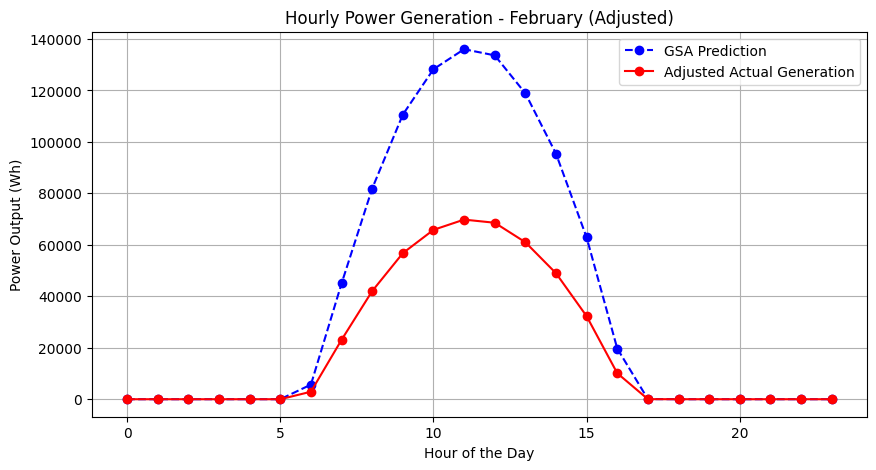

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feb_gsa = np.array([0, 0, 0, 0, 0, 0, 5675, 44973, 81887, 110596, 128245, 136014, 133629, 118878, 95416, 62872, 19702, 55, 0, 0, 0, 0, 0, 0])

deviation_factor = 1 - (48.68 / 100)

feb_actual = feb_gsa * deviation_factor

hours = np.arange(24)

plt.figure(figsize=(10, 5))
plt.plot(hours, feb_gsa, linestyle='dashed', marker='o', color='blue', label='GSA Prediction')
plt.plot(hours, feb_actual, linestyle='solid', marker='o', color='red', label='Adjusted Actual Generation')

plt.xlabel('Hour of the Day')
plt.ylabel('Power Output (Wh)')
plt.title('Hourly Power Generation - February (Adjusted)')
plt.legend()
plt.grid()

plt.show()


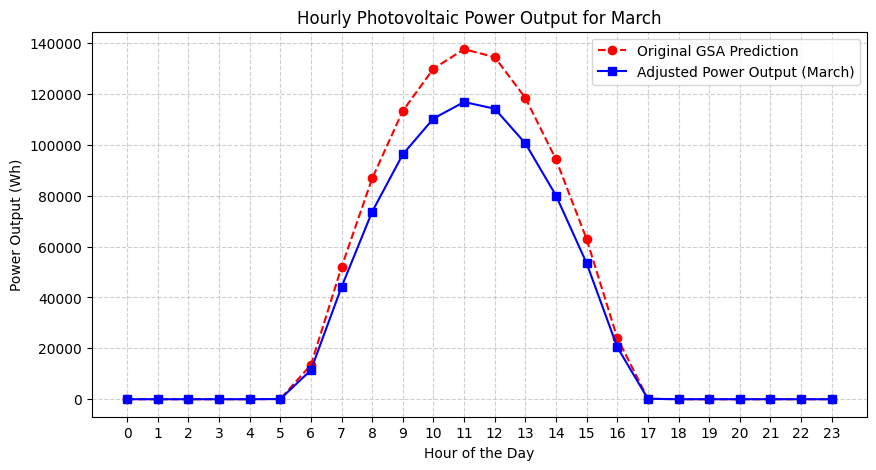

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

power_output_march = np.array([
    0, 0, 0, 0, 0, 92, 13482, 51979, 86830, 113382, 129966,
    137611, 134502, 118466, 94305, 62973, 24127, 197, 0, 0, 0, 0, 0, 0
])

deviation_factor = 1 - 0.1508
adjusted_power_output_march = power_output_march * deviation_factor

hours = np.arange(24)

plt.figure(figsize=(10, 5))
plt.plot(hours, power_output_march, marker='o', linestyle='dashed', color='red', label='Original GSA Prediction')
plt.plot(hours, adjusted_power_output_march, marker='s', linestyle='-', color='blue', label='Adjusted Power Output (March)')

plt.xlabel('Hour of the Day')
plt.ylabel('Power Output (Wh)')
plt.title('Hourly Photovoltaic Power Output for March')
plt.xticks(hours)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


               Apr          May         Jun         Jul         Aug  \
0-1         0.0000       0.0000      0.0000      0.0000      0.0000   
1-2         0.0000       0.0000      0.0000      0.0000      0.0000   
2-3         0.0000       0.0000      0.0000      0.0000      0.0000   
3-4         0.0000       0.0000      0.0000      0.0000      0.0000   
4-5         0.0000       0.0000      0.0000      0.0000      0.0000   
5-6      2342.9282    4847.8392   5262.9240   2265.0745   1257.7575   
6-7     21641.1635   22130.7956  19644.8220  12646.2895  10435.2573   
7-8     51765.8065   47148.3304  40422.6216  27552.2325  23305.6833   
8-9     80114.8792   72118.7988  62439.9660  42855.7155  36210.6507   
9-10   101155.5217   91395.9760  80739.6108  56253.7170  47605.5582   
10-11  113930.4856  102745.0796  92144.1708  66323.2245  56477.4417   
11-12  117993.4135  106286.3904  97298.6580  71830.9605  60801.1239   
12-13  113555.8322  102331.0696  94466.2140  71130.7480  60038.9604   
13-14 

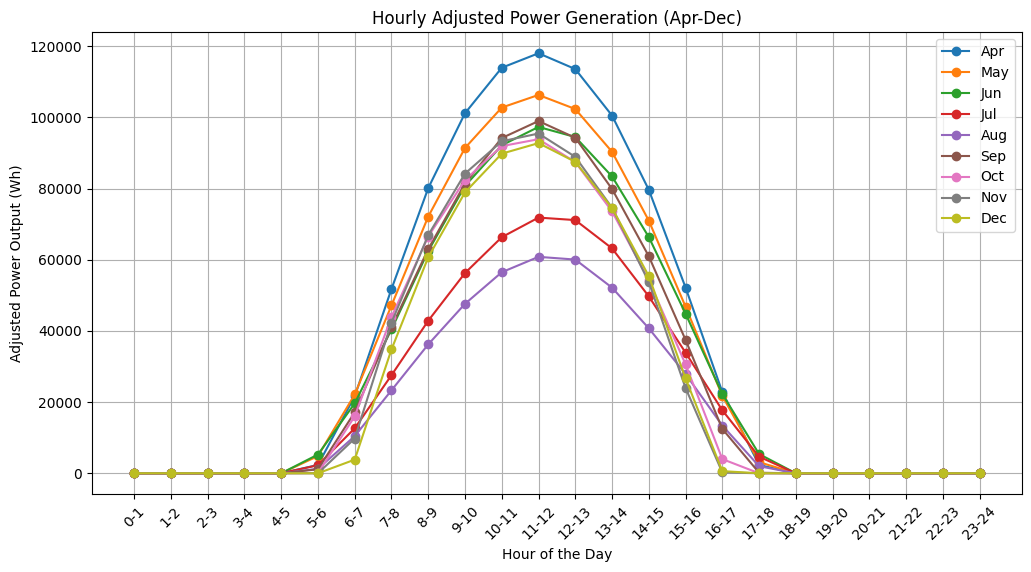

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

power_output = np.array([
    [0, 0, 0, 0, 0, 2614, 24145, 57755, 89384, 112859, 127112, 131645, 126694, 112120, 88847, 58219, 25466, 2597, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5562, 25391, 54094, 82743, 104860, 117881, 121944, 117406, 103618, 81430, 53699, 24953, 3583, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5630, 21015, 43242, 66795, 86371, 98571, 104085, 101055, 89210, 70993, 47970, 23828, 5778, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 2507, 13997, 30495, 47433, 62262, 73407, 79503, 78728, 69924, 55014, 37509, 19586, 5163, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1675, 13897, 31037, 48223, 63398, 75213, 80971, 79956, 69447, 54245, 37120, 17855, 2647, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1319, 19951, 47770, 73334, 94749, 109620, 115181, 109705, 92977, 70961, 43622, 14513, 174, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 95, 22579, 61986, 93894, 116290, 129738, 132481, 123423, 103880, 76598, 43194, 5625, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 13144, 56973, 90050, 113301, 125508, 128441, 119628, 100403, 72303, 32238, 331, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 5242, 47640, 83100, 108060, 122950, 127005, 119811, 102056, 75835, 36497, 818, 0, 0, 0, 0, 0, 0, 0]
])

deviation_factors = np.array([1 - 0.1037, 1 - 0.1284, 1 - 0.0652, 1 - 0.0965, 1 - 0.2491, 1 - 0.1409, 1 - 0.2916, 1 - 0.2569, 1 - 0.2697])

adjusted_power_output = power_output * deviation_factors[:, np.newaxis]

hours = [f"{h}-{h+1}" for h in range(24)]
months = ["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df = pd.DataFrame(adjusted_power_output, index=months, columns=hours)

df_transposed = df.T
print(df_transposed)
plt.figure(figsize=(12, 6))
for i, month in enumerate(months):
    plt.plot(hours, adjusted_power_output[i], marker='o', linestyle='-', label=month)

plt.xlabel('Hour of the Day')
plt.ylabel('Adjusted Power Output (Wh)')
plt.title('Hourly Adjusted Power Generation (Apr-Dec)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


            Jan         Feb          Mar          Apr          May  \
0-1        0.00      0.0000       0.0000       0.0000       0.0000   
1-2        0.00      0.0000       0.0000       0.0000       0.0000   
2-3        0.00      0.0000       0.0000       0.0000       0.0000   
3-4        0.00      0.0000       0.0000       0.0000       0.0000   
4-5        0.00      0.0000       0.0000       0.0000       0.0000   
5-6        0.00      0.0000      78.1264    2342.9282    4847.8392   
6-7     1575.60   2912.4100   11448.9144   21641.1635   22130.7956   
7-8    21379.80  23080.1436   44140.5668   51765.8065   47148.3304   
8-9    40366.04  42024.4084   73736.0360   80114.8792   72118.7988   
9-10   54386.28  56757.8672   96283.9944  101155.5217   91395.9760   
10-11  63344.32  65815.3340  110367.1272  113930.4856  102745.0796   
11-12  66925.56  69802.3848  116859.2612  117993.4135  106286.3904   
12-13  64682.80  68578.4028  114219.0984  113555.8322  102331.0696   
13-14  56626.44  610

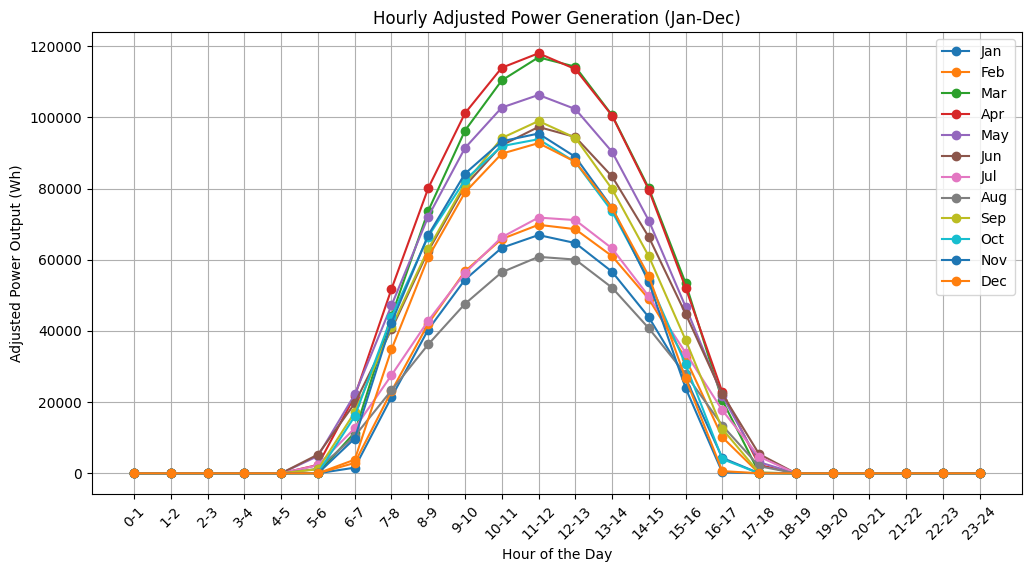

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

power_output = np.array([
    [0, 0, 0, 0, 0, 0, 3030, 41115, 77627, 104589, 121816, 128703, 124390, 108897, 84291, 51540, 8344, 0, 0, 0, 0, 0, 0, 0],  # Jan
    [0, 0, 0, 0, 0, 0, 5675, 44973, 81887, 110596, 128245, 136014, 133629, 118878, 95416, 62872, 19702, 55, 0, 0, 0, 0, 0, 0],  # Feb
    [0, 0, 0, 0, 0, 92, 13482, 51979, 86830, 113382, 129966, 137611, 134502, 118466, 94305, 62973, 24127, 197, 0, 0, 0, 0, 0, 0],  # Mar
    [0, 0, 0, 0, 0, 2614, 24145, 57755, 89384, 112859, 127112, 131645, 126694, 112120, 88847, 58219, 25466, 2597, 0, 0, 0, 0, 0, 0],  # Apr
    [0, 0, 0, 0, 0, 5562, 25391, 54094, 82743, 104860, 117881, 121944, 117406, 103618, 81430, 53699, 24953, 3583, 0, 0, 0, 0, 0, 0],  # May
    [0, 0, 0, 0, 0, 5630, 21015, 43242, 66795, 86371, 98571, 104085, 101055, 89210, 70993, 47970, 23828, 5778, 0, 0, 0, 0, 0, 0],  # Jun
    [0, 0, 0, 0, 0, 2507, 13997, 30495, 47433, 62262, 73407, 79503, 78728, 69924, 55014, 37509, 19586, 5163, 0, 0, 0, 0, 0, 0],  # Jul
    [0, 0, 0, 0, 0, 1675, 13897, 31037, 48223, 63398, 75213, 80971, 79956, 69447, 54245, 37120, 17855, 2647, 0, 0, 0, 0, 0, 0],  # Aug
    [0, 0, 0, 0, 0, 1319, 19951, 47770, 73334, 94749, 109620, 115181, 109705, 92977, 70961, 43622, 14513, 174, 0, 0, 0, 0, 0, 0],  # Sep
    [0, 0, 0, 0, 0, 95, 22579, 61986, 93894, 116290, 129738, 132481, 123423, 103880, 76598, 43194, 5625, 0, 0, 0, 0, 0, 0, 0],  # Oct
    [0, 0, 0, 0, 0, 0, 13144, 56973, 90050, 113301, 125508, 128441, 119628, 100403, 72303, 32238, 331, 0, 0, 0, 0, 0, 0, 0],  # Nov
    [0, 0, 0, 0, 0, 0, 5242, 47640, 83100, 108060, 122950, 127005, 119811, 102056, 75835, 36497, 818, 0, 0, 0, 0, 0, 0, 0]   # Dec
])

deviation_factors = np.array([1 - 0.48, 1 - 0.4868, 1 - 0.1508, 1 - 0.1037, 1 - 0.1284, 1 - 0.0652, 1 - 0.0965, 1 - 0.2491, 1 - 0.1409, 1 - 0.2916, 1 - 0.2569, 1 - 0.2697])

adjusted_power_output = power_output * deviation_factors[:, np.newaxis]

hours = [f"{h}-{h+1}" for h in range(24)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df = pd.DataFrame(adjusted_power_output, index=months, columns=hours)

df_transposed = df.T
print(df_transposed)

plt.figure(figsize=(12, 6))
for i, month in enumerate(months):
    plt.plot(hours, adjusted_power_output[i], marker='o', linestyle='-', label=month)

plt.xlabel('Hour of the Day')
plt.ylabel('Adjusted Power Output (Wh)')
plt.title('Hourly Adjusted Power Generation (Jan-Dec)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


       0:00-1:00  1:00-2:00  2:00-3:00  3:00-4:00  4:00-5:00  5:00-6:00  \
Day 1        0.0        0.0        0.0        0.0        0.0        0.0   
Day 2        0.0        0.0        0.0        0.0        0.0        0.0   
Day 3        0.0        0.0        0.0        0.0        0.0        0.0   
Day 4        0.0        0.0        0.0        0.0        0.0        0.0   
Day 5        0.0        0.0        0.0        0.0        0.0        0.0   

       6:00-7:00   7:00-8:00    8:00-9:00   9:00-10:00  ...  14:00-15:00  \
Day 1  50.825806  689.670968  1302.130323  1754.396129  ...  1413.913548   
Day 2  50.825806  689.670968  1302.130323  1754.396129  ...  1413.913548   
Day 3  50.825806  689.670968  1302.130323  1754.396129  ...  1413.913548   
Day 4  50.825806  689.670968  1302.130323  1754.396129  ...  1413.913548   
Day 5  50.825806  689.670968  1302.130323  1754.396129  ...  1413.913548   

       15:00-16:00  16:00-17:00  17:00-18:00  18:00-19:00  19:00-20:00  \
Day 1   864.541935

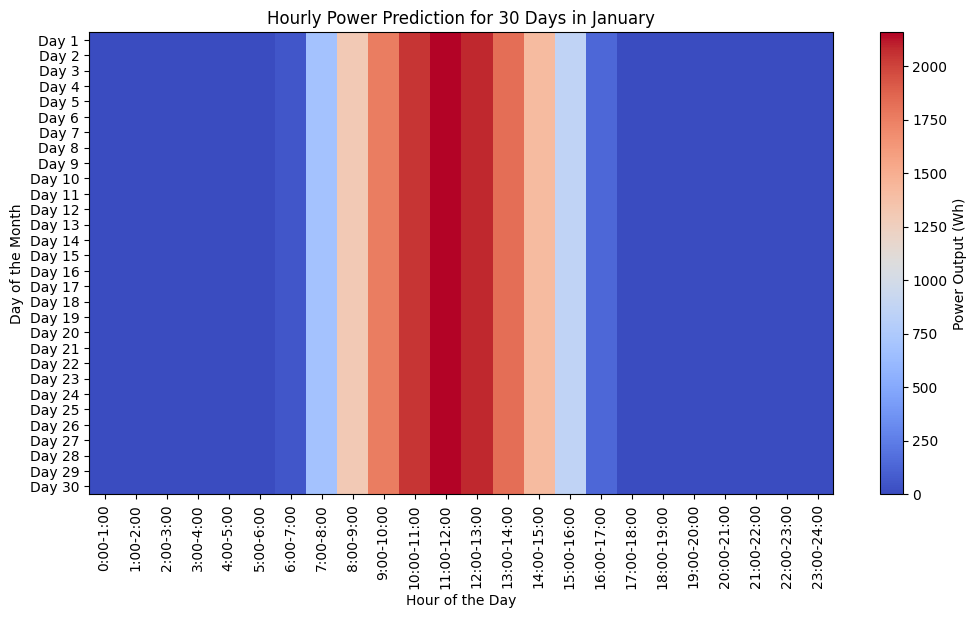

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
GSA_monthly_total = 854342

days_in_month = 31

deviation_factor = 1 - 0.48
GSA_daily_power = GSA_monthly_total / days_in_month
adjusted_daily_power = GSA_daily_power * deviation_factor
GSA_hourly_profile = np.array([0, 0, 0, 0, 0, 0, 3030, 41115, 77627, 104589, 121816,
                               128703, 124390, 108897, 84291, 51540, 8344, 0, 0, 0, 0, 0, 0, 0])

GSA_hourly_distribution = GSA_hourly_profile / np.sum(GSA_hourly_profile)
adjusted_30_days = np.array([adjusted_daily_power * GSA_hourly_distribution for _ in range(30)])
hours = [f"{h}:00-{h+1}:00" for h in range(24)]
days = [f"Day {d+1}" for d in range(30)]
df_30_days = pd.DataFrame(adjusted_30_days, index=days, columns=hours)

print(df_30_days.head())

plt.figure(figsize=(12, 6))
plt.imshow(adjusted_30_days, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Power Output (Wh)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.title('Hourly Power Prediction for 30 Days in January')
plt.xticks(ticks=np.arange(24), labels=hours, rotation=90)
plt.yticks(ticks=np.arange(30), labels=days)
plt.show()

df_30_days.to_csv("January_30_Days_Power_Prediction.csv")


              Jan          Feb          Mar          Apr          May  Jun  \
0-1        0.0000       0.0000       0.0000       0.0000       0.0000  0.0   
1-2        0.0000       0.0000       0.0000       0.0000       0.0000  0.0   
2-3        0.0000       0.0000       0.0000       0.0000       0.0000  0.0   
3-4        0.0000       0.0000       0.0000       0.0000       0.0000  0.0   
4-5        0.0000       0.0000       0.0000       0.0000       0.0000  0.0   
5-6        0.0000       0.0000      83.1496    2288.5570    5295.5802  0.0   
6-7     1915.2630    6500.1450   12185.0316   21138.9475   24174.7711  0.0   
7-8    25988.7915   51512.0742   46978.6202   50564.5025   51502.8974  0.0   
8-9    49068.0267   93793.3698   78476.9540   78255.6920   78779.6103  0.0   
9-10   66110.7069  126676.6584  102474.6516   98808.0545   99837.2060  0.0   
10-11  76999.8936  146891.8230  117463.2708  111286.5560  112234.5001  0.0   
11-12  81353.1663  155790.4356  124372.8218  115255.1975  116102

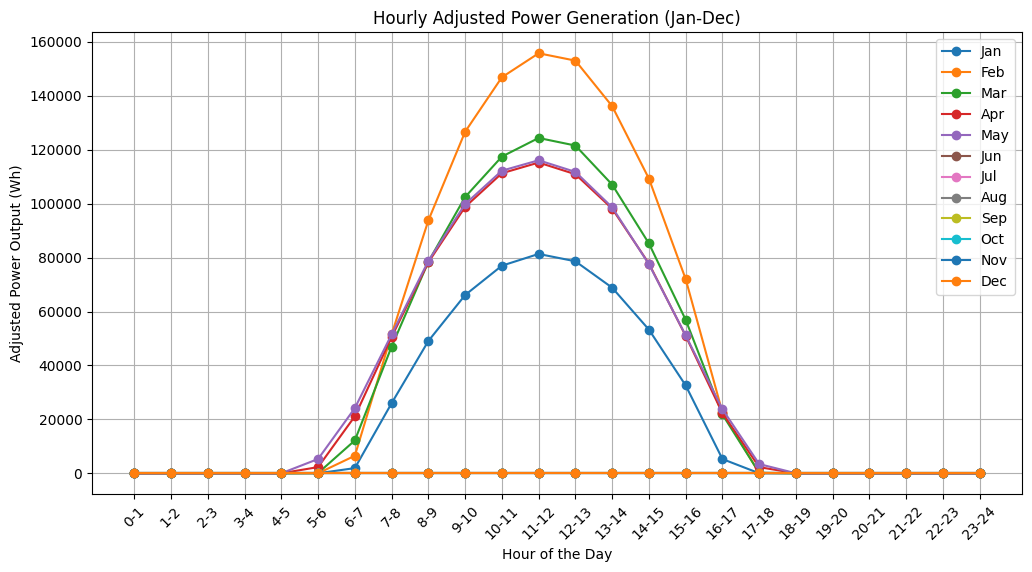

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_data():
    """Initialize the original power output data."""
    power_output = np.array([
        [0, 0, 0, 0, 0, 0, 3030, 41115, 77627, 104589, 121816, 128703, 124390, 108897, 84291, 51540, 8344, 0, 0, 0, 0, 0, 0, 0],  # Jan
        [0, 0, 0, 0, 0, 0, 5675, 44973, 81887, 110596, 128245, 136014, 133629, 118878, 95416, 62872, 19702, 55, 0, 0, 0, 0, 0, 0],  # Feb
        [0, 0, 0, 0, 0, 92, 13482, 51979, 86830, 113382, 129966, 137611, 134502, 118466, 94305, 62973, 24127, 197, 0, 0, 0, 0, 0, 0],  # Mar
        [0, 0, 0, 0, 0, 2614, 24145, 57755, 89384, 112859, 127112, 131645, 126694, 112120, 88847, 58219, 25466, 2597, 0, 0, 0, 0, 0, 0],  # Apr
        [0, 0, 0, 0, 0, 5562, 25391, 54094, 82743, 104860, 117881, 121944, 117406, 103618, 81430, 53699, 24953, 3583, 0, 0, 0, 0, 0, 0],  # May
        [0, 0, 0, 0, 0, 5630, 21015, 43242, 66795, 86371, 98571, 104085, 101055, 89210, 70993, 47970, 23828, 5778, 0, 0, 0, 0, 0, 0],  # Jun
        [0, 0, 0, 0, 0, 2507, 13997, 30495, 47433, 62262, 73407, 79503, 78728, 69924, 55014, 37509, 19586, 5163, 0, 0, 0, 0, 0, 0],  # Jul
        [0, 0, 0, 0, 0, 1675, 13897, 31037, 48223, 63398, 75213, 80971, 79956, 69447, 54245, 37120, 17855, 2647, 0, 0, 0, 0, 0, 0],  # Aug
        [0, 0, 0, 0, 0, 1319, 19951, 47770, 73334, 94749, 109620, 115181, 109705, 92977, 70961, 43622, 14513, 174, 0, 0, 0, 0, 0, 0],  # Sep
        [0, 0, 0, 0, 0, 95, 22579, 61986, 93894, 116290, 129738, 132481, 123423, 103880, 76598, 43194, 5625, 0, 0, 0, 0, 0, 0, 0],  # Oct
        [0, 0, 0, 0, 0, 0, 13144, 56973, 90050, 113301, 125508, 128441, 119628, 100403, 72303, 32238, 331, 0, 0, 0, 0, 0, 0, 0],  # Nov
        [0, 0, 0, 0, 0, 0, 5242, 47640, 83100, 108060, 122950, 127005, 119811, 102056, 75835, 36497, 818, 0, 0, 0, 0, 0, 0, 0]   # Dec
    ])

    deviation_percentages = np.array([-36.79, 14.54, -9.62, -12.45, -4.79, -100, -100, -100, -100, -100, -100, -100])
    deviation_factors = 1 + (deviation_percentages / 100)

    return power_output, deviation_factors

def adjust_power_output(power_output, deviation_factors):
    """Apply deviation correction to the power output data."""
    return power_output * deviation_factors[:, np.newaxis]

def create_dataframe(adjusted_power_output):
    """Create a DataFrame for better visualization."""
    hours = [f"{h}-{h+1}" for h in range(24)]
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df = pd.DataFrame(adjusted_power_output, index=months, columns=hours)
    return df

def plot_adjusted_power_output(adjusted_power_output):
    """Plot the adjusted power output for each month."""
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    hours = [f"{h}-{h+1}" for h in range(24)]

    plt.figure(figsize=(12, 6))
    for i, month in enumerate(months):
        plt.plot(hours, adjusted_power_output[i], marker='o', linestyle='-', label=month)

    plt.xlabel('Hour of the Day')
    plt.ylabel('Adjusted Power Output (Wh)')
    plt.title('Hourly Adjusted Power Generation (Jan-Dec)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

def main():
    """Main function to execute all operations."""

    power_output, deviation_factors = initialize_data()

    adjusted_power_output = adjust_power_output(power_output, deviation_factors)

    df = create_dataframe(adjusted_power_output)
    print(df.T)

    plot_adjusted_power_output(adjusted_power_output)

if __name__ == "__main__":
    main()


# **AI Implementation**

**Random Forest**

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Model Evaluation (Jan-May 2024):
MAE: 4328.11 kWh
RMSE: 8213.93 kWh
R² Score: 0.9400


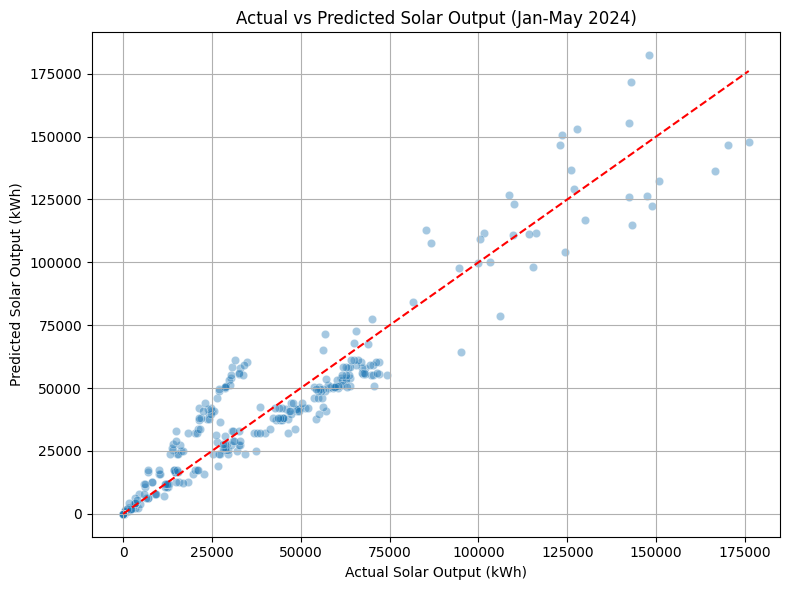

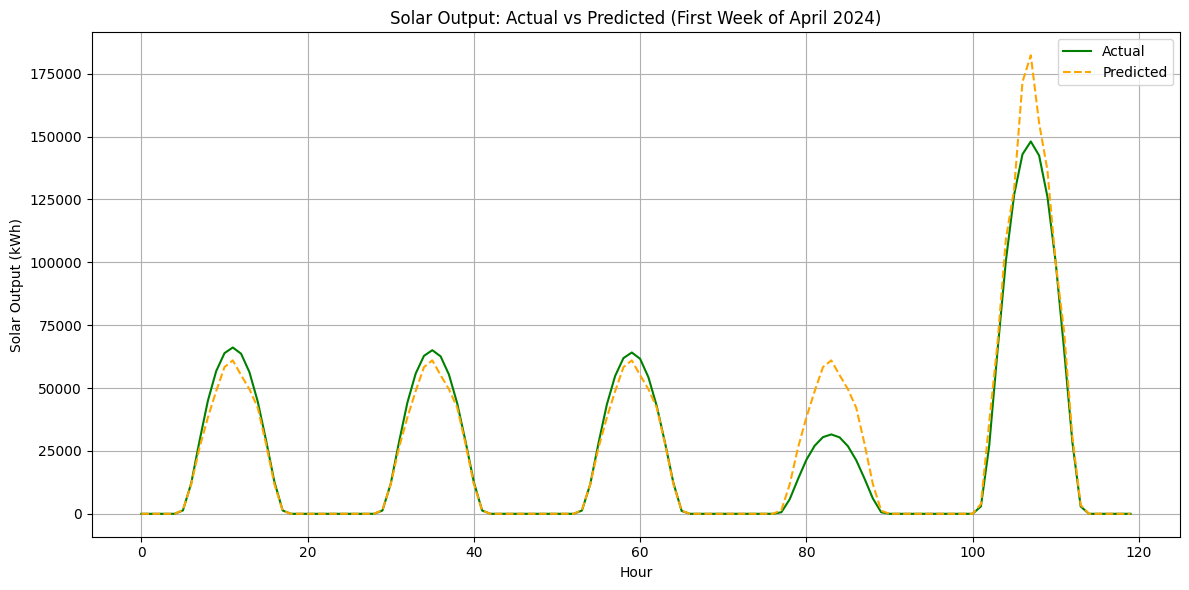

<ipython-input-1-22d3847de926>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x="Importance", y="Feature", palette="viridis")


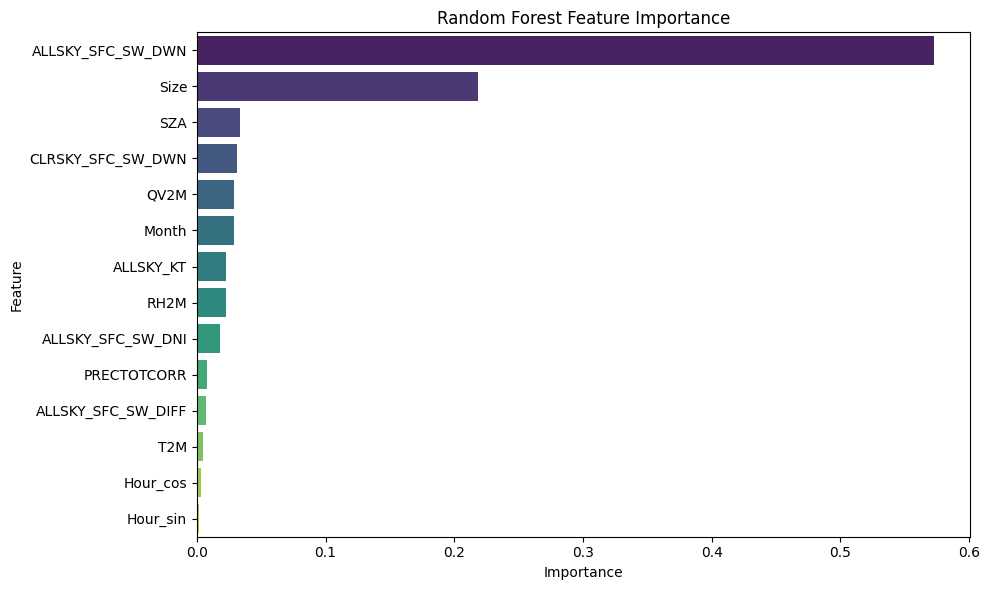


Feature Importance Table:
               Feature  Importance
0    ALLSKY_SFC_SW_DWN    0.572477
11                Size    0.218104
5                  SZA    0.033769
1    CLRSKY_SFC_SW_DWN    0.031001
6                 QV2M    0.029127
10               Month    0.029041
4            ALLSKY_KT    0.022885
8                 RH2M    0.022523
2    ALLSKY_SFC_SW_DNI    0.017750
7          PRECTOTCORR    0.007691
3   ALLSKY_SFC_SW_DIFF    0.007008
9                  T2M    0.004441
13            Hour_cos    0.002859
12            Hour_sin    0.001325


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_excel("/content/Merged_Solar_Weather_Data.xlsx")
df = df.dropna(subset=["Solar_Output_kWh"])
df.loc[(df["ALLSKY_KT"].isna()) & (df["SZA"] > 85), "ALLSKY_KT"] = 0
df["ALLSKY_KT"] = df["ALLSKY_KT"].interpolate(method='linear')
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

df = df.dropna()
features = [
    "ALLSKY_SFC_SW_DWN", "CLRSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DNI", "ALLSKY_SFC_SW_DIFF",
    "ALLSKY_KT", "SZA", "QV2M", "PRECTOTCORR", "RH2M", "T2M", "Month", "Size",
    "Hour_sin", "Hour_cos"
]
X = df[features]
y = df["Solar_Output_kWh"]

train_idx = df[(df['Year'] <= 2024) & ~((df['Year'] == 2024) & (df['Month'] >= 4))].index
test_idx = df[(df['Year'] == 2024) & (df['Month'].isin([1, 2, 3, 4, 5]))].index

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (Jan-May 2024):")
print(f"MAE: {mae:.2f} kWh")
print(f"RMSE: {rmse:.2f} kWh")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Solar Output (kWh)")
plt.ylabel("Predicted Solar Output (kWh)")
plt.title("Actual vs Predicted Solar Output (Jan-May 2024)")
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_scatter_actual_vs_predicted.png")
plt.show()

df_apr = df[(df["Year"] == 2024) & (df["Month"] == 4)].head(168)
X_apr = df_apr[features]
y_apr_true = df_apr["Solar_Output_kWh"]
y_apr_pred = best_model.predict(X_apr)

plt.figure(figsize=(12, 6))
plt.plot(y_apr_true.values, label="Actual", color='green')
plt.plot(y_apr_pred, label="Predicted", color='orange', linestyle='--')
plt.xlabel("Hour")
plt.ylabel("Solar Output (kWh)")
plt.title("Solar Output: Actual vs Predicted (First Week of April 2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_timeseries_first_week_april.png")
plt.show()

importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.show()

print("\nFeature Importance Table:")
print(importances)



**Random Forest (Lag Features Included)**

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Model Evaluation (Jan-May 2024):
MAE: 750.08 kWh
RMSE: 2180.04 kWh
R² Score: 0.9958


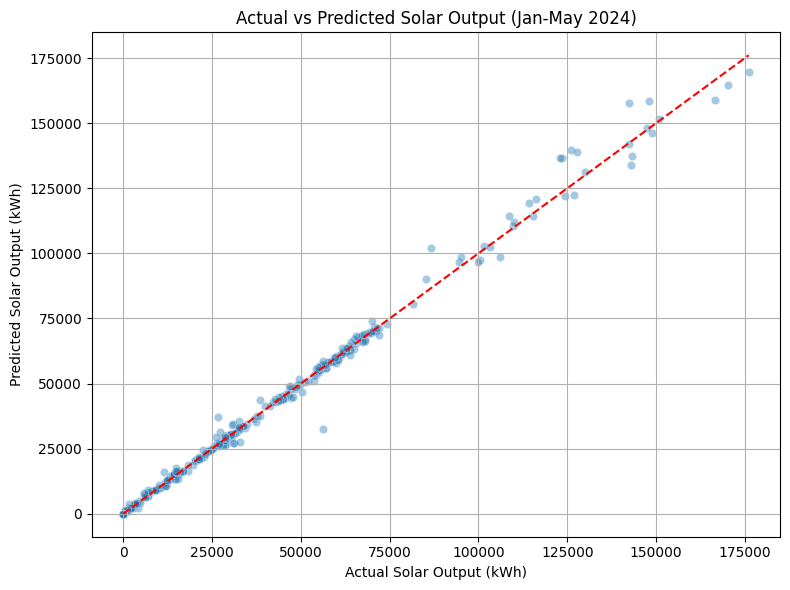

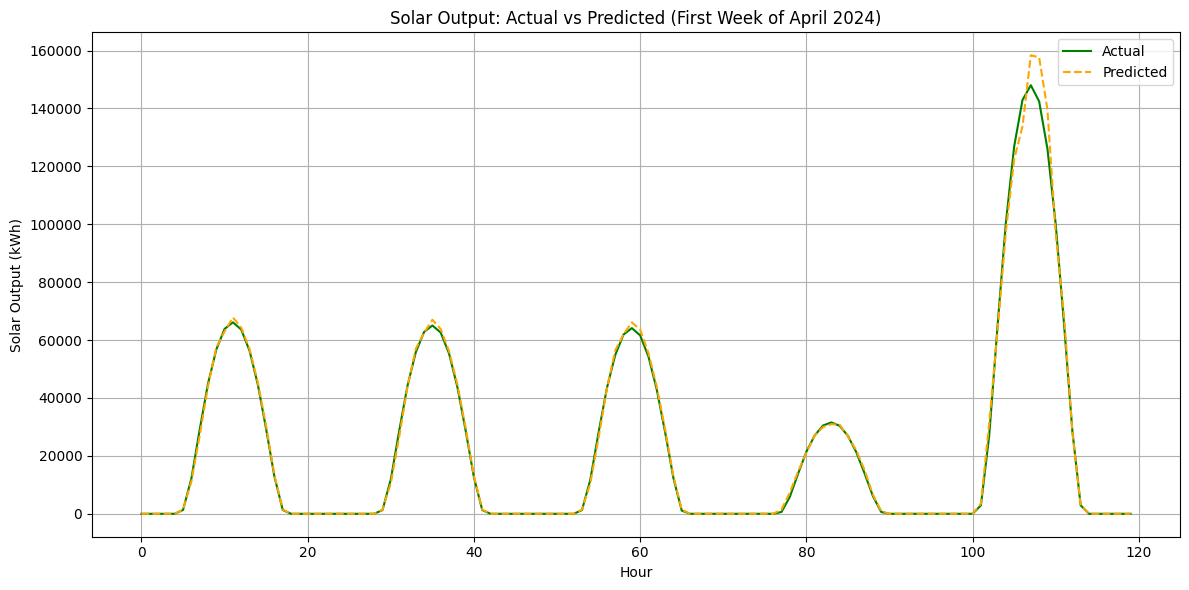

<ipython-input-2-454c448644e8>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x="Importance", y="Feature", palette="viridis")


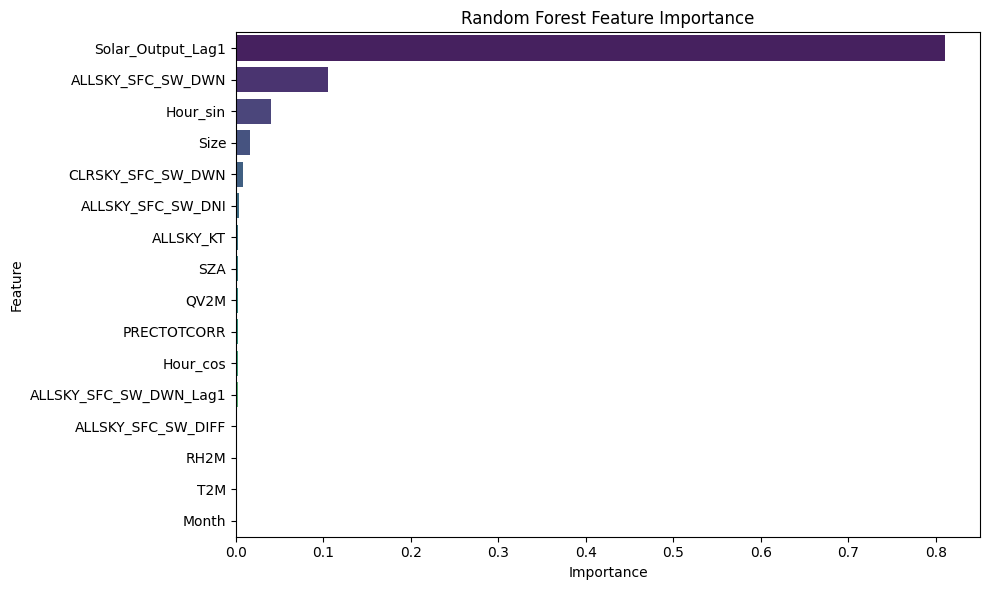


Feature Importance Table:
                   Feature  Importance
12       Solar_Output_Lag1    0.810140
0        ALLSKY_SFC_SW_DWN    0.104956
14                Hour_sin    0.040060
11                    Size    0.016344
1        CLRSKY_SFC_SW_DWN    0.008535
2        ALLSKY_SFC_SW_DNI    0.003428
4                ALLSKY_KT    0.002402
5                      SZA    0.002343
6                     QV2M    0.002109
7              PRECTOTCORR    0.001959
15                Hour_cos    0.001942
13  ALLSKY_SFC_SW_DWN_Lag1    0.001913
3       ALLSKY_SFC_SW_DIFF    0.001768
8                     RH2M    0.000797
9                      T2M    0.000691
10                   Month    0.000615


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_excel("/content/Merged_Solar_Weather_Data.xlsx")
df = df.dropna(subset=["Solar_Output_kWh"])

df.loc[(df["ALLSKY_KT"].isna()) & (df["SZA"] > 85), "ALLSKY_KT"] = 0
df["ALLSKY_KT"] = df["ALLSKY_KT"].interpolate(method='linear')

df["Solar_Output_Lag1"] = df["Solar_Output_kWh"].shift(1)
df["ALLSKY_SFC_SW_DWN_Lag1"] = df["ALLSKY_SFC_SW_DWN"].shift(1)
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
df = df.dropna()

features = [
    "ALLSKY_SFC_SW_DWN", "CLRSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DNI", "ALLSKY_SFC_SW_DIFF",
    "ALLSKY_KT", "SZA", "QV2M", "PRECTOTCORR", "RH2M", "T2M", "Month", "Size",
    "Solar_Output_Lag1", "ALLSKY_SFC_SW_DWN_Lag1", "Hour_sin", "Hour_cos"
]
X = df[features]
y = df["Solar_Output_kWh"]

train_idx = df[(df['Year'] <= 2024) & ~((df['Year'] == 2024) & (df['Month'] >= 4))].index
test_idx = df[(df['Year'] == 2024) & (df['Month'].isin([1, 2, 3, 4, 5]))].index

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (Jan-May 2024):")
print(f"MAE: {mae:.2f} kWh")
print(f"RMSE: {rmse:.2f} kWh")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Solar Output (kWh)")
plt.ylabel("Predicted Solar Output (kWh)")
plt.title("Actual vs Predicted Solar Output (Jan-May 2024)")
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_scatter_actual_vs_predicted.png")
plt.show()

df_apr = df[(df["Year"] == 2024) & (df["Month"] == 4)].head(168)
X_apr = df_apr[features]
y_apr_true = df_apr["Solar_Output_kWh"]
y_apr_pred = best_model.predict(X_apr)

plt.figure(figsize=(12, 6))
plt.plot(y_apr_true.values, label="Actual", color='green')
plt.plot(y_apr_pred, label="Predicted", color='orange', linestyle='--')
plt.xlabel("Hour")
plt.ylabel("Solar Output (kWh)")
plt.title("Solar Output: Actual vs Predicted (First Week of April 2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_timeseries_first_week_april.png")
plt.show()

importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.show()

print("\nFeature Importance Table:")
print(importances)


**XGBoost**

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

XGBoost Model Evaluation (Jan-May 2024):
MAE: 4760.61 kWh
RMSE: 9734.68 kWh
R² Score: 0.9157


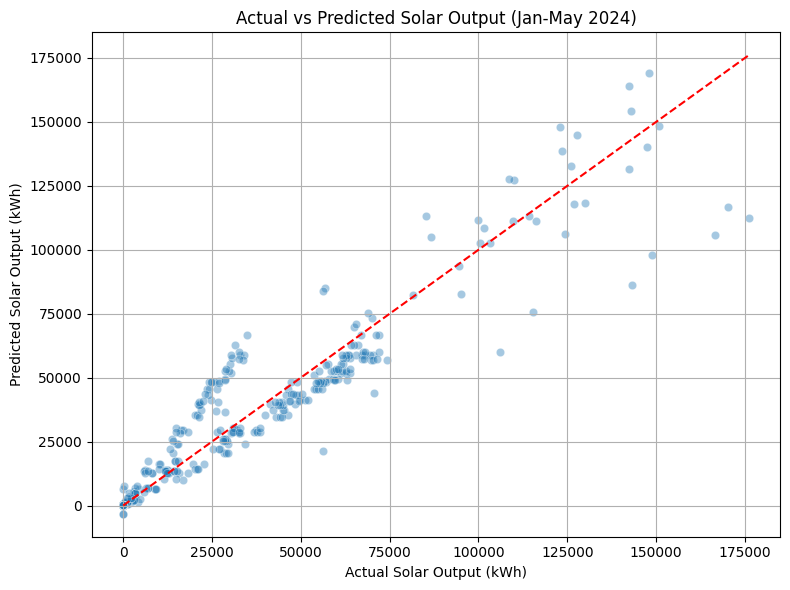

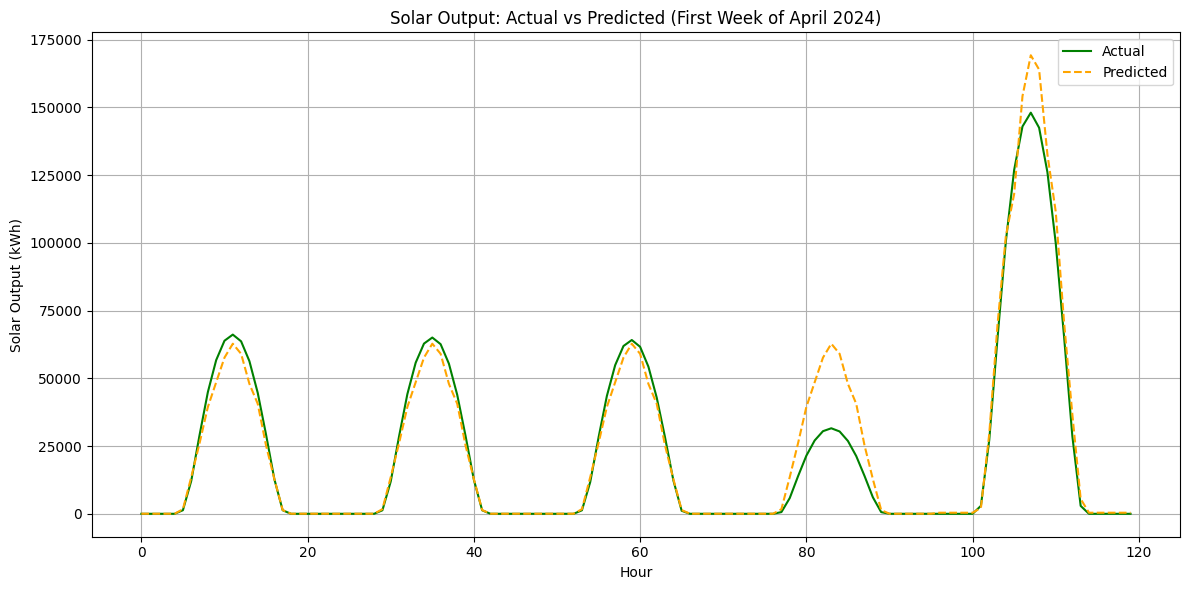

<ipython-input-3-5a608049d63b>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x="Importance", y="Feature", palette="viridis")


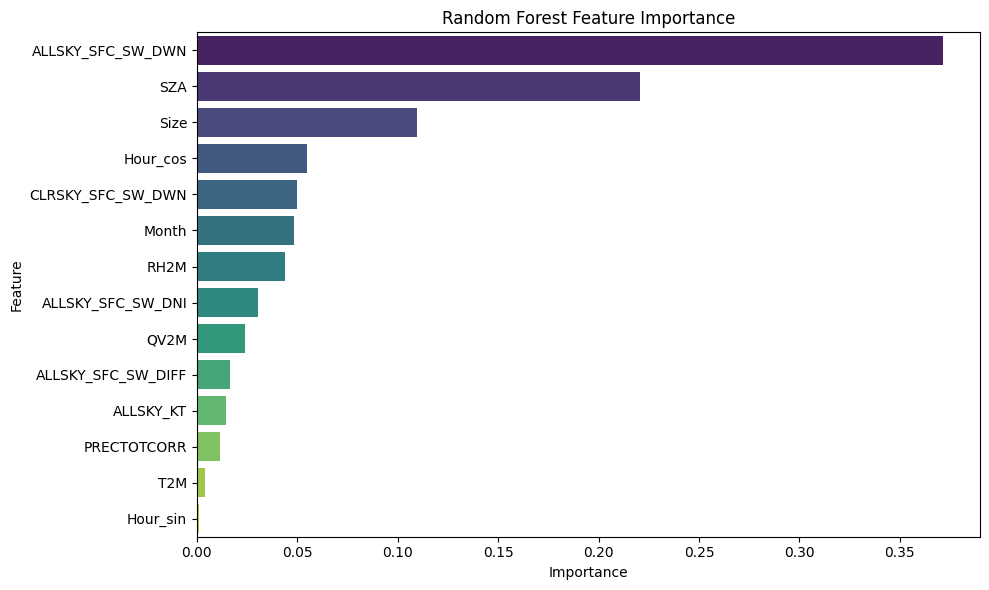


Feature Importance Table:
               Feature  Importance
0    ALLSKY_SFC_SW_DWN    0.371330
5                  SZA    0.220424
11                Size    0.109451
13            Hour_cos    0.055024
1    CLRSKY_SFC_SW_DWN    0.049664
10               Month    0.048394
8                 RH2M    0.043926
2    ALLSKY_SFC_SW_DNI    0.030518
6                 QV2M    0.024143
3   ALLSKY_SFC_SW_DIFF    0.016330
4            ALLSKY_KT    0.014667
7          PRECTOTCORR    0.011303
9                  T2M    0.003929
12            Hour_sin    0.000897


<ipython-input-3-5a608049d63b>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x="Importance", y="Feature", palette="coolwarm")


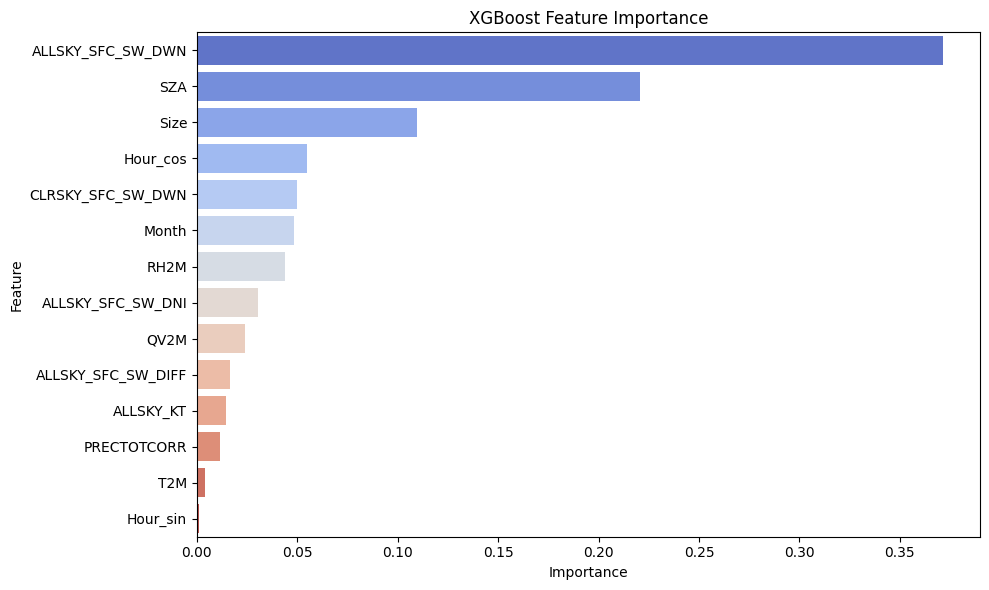


Feature Importance Table (XGBoost):
               Feature  Importance
0    ALLSKY_SFC_SW_DWN    0.371330
5                  SZA    0.220424
11                Size    0.109451
13            Hour_cos    0.055024
1    CLRSKY_SFC_SW_DWN    0.049664
10               Month    0.048394
8                 RH2M    0.043926
2    ALLSKY_SFC_SW_DNI    0.030518
6                 QV2M    0.024143
3   ALLSKY_SFC_SW_DIFF    0.016330
4            ALLSKY_KT    0.014667
7          PRECTOTCORR    0.011303
9                  T2M    0.003929
12            Hour_sin    0.000897


In [ ]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_excel("/content/Merged_Solar_Weather_Data.xlsx")
df = df.dropna(subset=["Solar_Output_kWh"])
df.loc[(df["ALLSKY_KT"].isna()) & (df["SZA"] > 85), "ALLSKY_KT"] = 0
df["ALLSKY_KT"] = df["ALLSKY_KT"].interpolate(method='linear')
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

df = df.dropna()
features = [
    "ALLSKY_SFC_SW_DWN", "CLRSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DNI", "ALLSKY_SFC_SW_DIFF",
    "ALLSKY_KT", "SZA", "QV2M", "PRECTOTCORR", "RH2M", "T2M", "Month", "Size",
    "Hour_sin", "Hour_cos"
]
X = df[features]
y = df["Solar_Output_kWh"]
train_idx = df[(df['Year'] <= 2024) & ~((df['Year'] == 2024) & (df['Month'] >= 4))].index
test_idx = df[(df['Year'] == 2024) & (df['Month'].isin([1, 2, 3, 4, 5]))].index

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]
tscv = TimeSeriesSplit(n_splits=5)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=tscv, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters (XGBoost):", grid_search.best_params_)
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nXGBoost Model Evaluation (Jan-May 2024):")
print(f"MAE: {mae:.2f} kWh")
print(f"RMSE: {rmse:.2f} kWh")
print(f"R² Score: {r2:.4f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Solar Output (kWh)")
plt.ylabel("Predicted Solar Output (kWh)")
plt.title("Actual vs Predicted Solar Output (Jan-May 2024)")
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_scatter_actual_vs_predicted.png")
plt.show()
df_apr = df[(df["Year"] == 2024) & (df["Month"] == 4)].head(168)
X_apr = df_apr[features]
y_apr_true = df_apr["Solar_Output_kWh"]
y_apr_pred = best_model.predict(X_apr)

plt.figure(figsize=(12, 6))
plt.plot(y_apr_true.values, label="Actual", color='green')
plt.plot(y_apr_pred, label="Predicted", color='orange', linestyle='--')
plt.xlabel("Hour")
plt.ylabel("Solar Output (kWh)")
plt.title("Solar Output: Actual vs Predicted (First Week of April 2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_timeseries_first_week_april.png")
plt.show()
importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.show()

print("\nFeature Importance Table:")
print(importances)
importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x="Importance", y="Feature", palette="coolwarm")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.savefig("xgb_feature_importance.png")
plt.show()

print("\nFeature Importance Table (XGBoost):")
print(importances)


**CNN-LSTM**

<ipython-input-4-38ef63a763b7>:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill'))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 1.3809 - mae: 0.9423 - val_loss: 1.0036 - val_mae: 0.8667 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.6823 - mae: 0.6737 - val_loss: 0.9275 - val_mae: 0.8333 - learning_rate: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4084 - mae: 0.5021 - val_loss: 0.8715 - val_mae: 0.7969 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.2956 - mae: 0.4227 - val_loss: 0.7792 - val_mae: 0.7656 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.2347 - mae: 0.3733 - val_loss: 0.6421 - val_mae: 0.6796 - learning_rate: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.1885 - mae: 0.3350 - val_loss: 0.5114 - val_mae: 0.5952 - learning_rate: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.1534 - mae: 0.2993 - val_loss: 0.4602 - val_mae: 0.5480 - learning_rate: 0.0010
Epoch 8/50

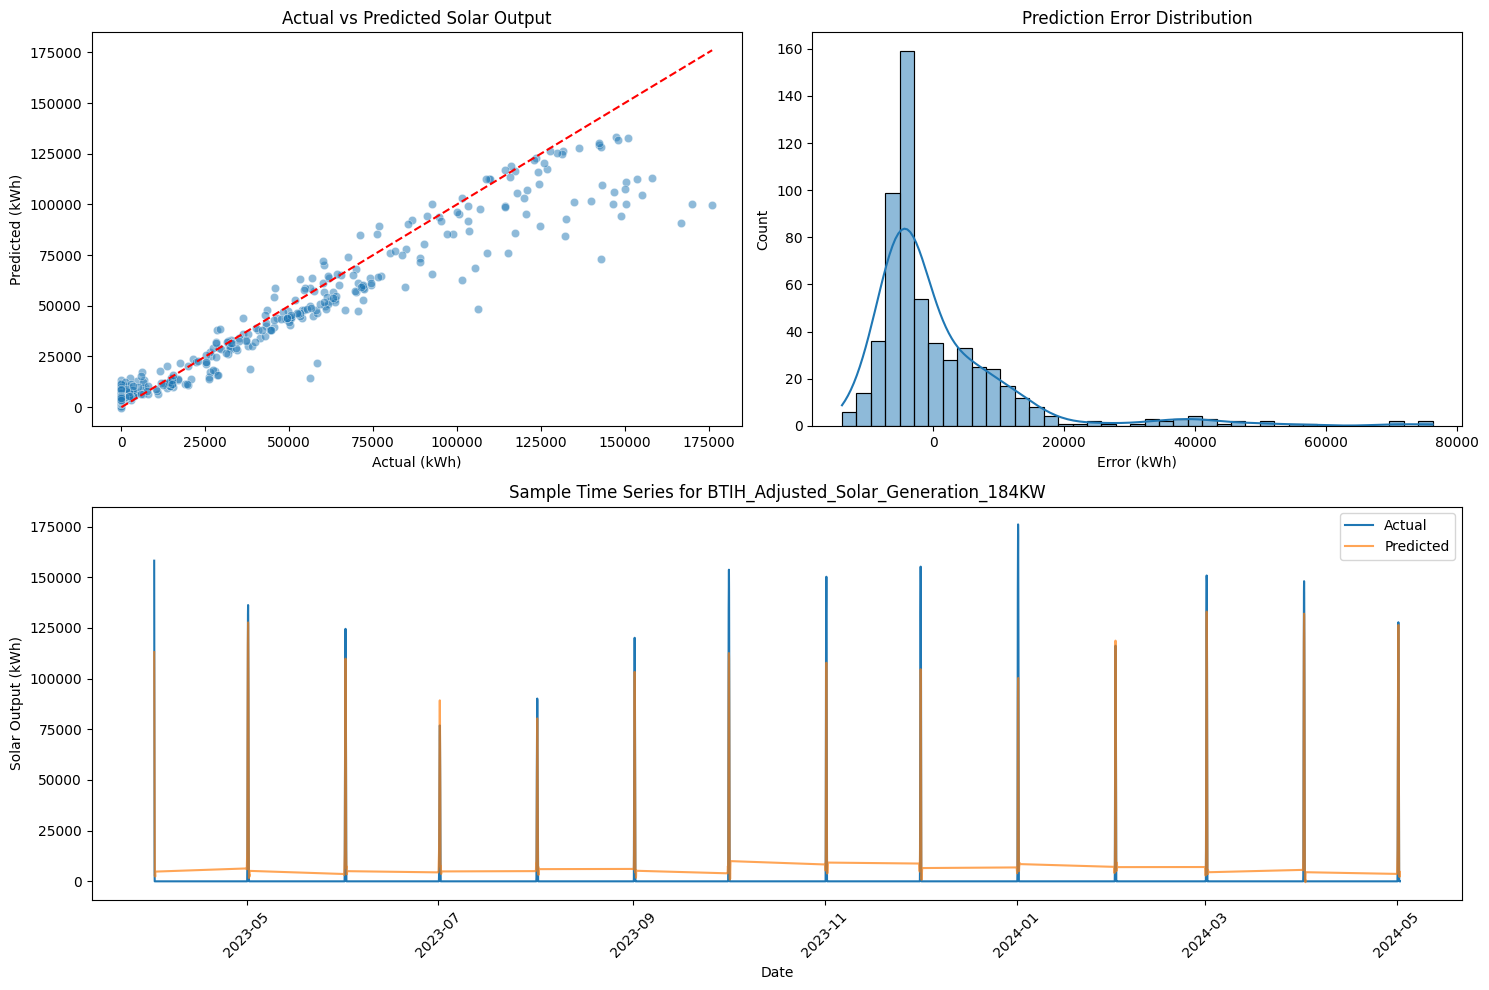

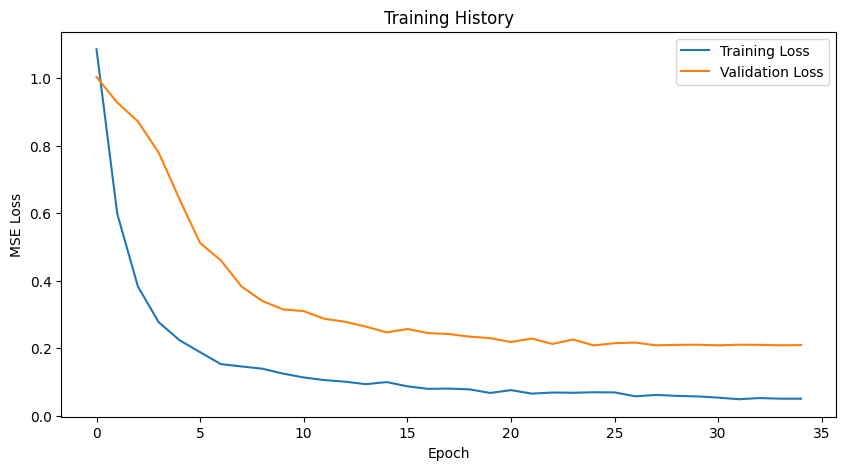

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

np.random.seed(42)
def load_and_preprocess_data(filepath):
    df = pd.read_excel(filepath)
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['Day_of_year'] = df['DateTime'].dt.dayofyear
    df['Week_of_year'] = df['DateTime'].dt.isocalendar().week
    df['Is_daylight'] = (df['SZA'] < 85).astype(int)
    df = df.dropna(subset=["Solar_Output_kWh"])
    df['ALLSKY_KT'] = np.where((df['ALLSKY_KT'].isna()) & (df['SZA'] > 85), 0, df['ALLSKY_KT'])
    df['ALLSKY_KT'] = df.groupby(['Installation', 'Hour'])['ALLSKY_KT'].transform(
        lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill'))

    df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
    df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
    df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
    df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

    df['Capacity_ratio'] = df['Solar_Output_kWh'] / df['Size']

    for lag in [1, 2, 3, 24]:
        df[f'ALLSKY_SFC_SW_DWN_lag_{lag}'] = df.groupby('Installation')['ALLSKY_SFC_SW_DWN'].shift(lag)
        df[f'Solar_Output_lag_{lag}'] = df.groupby('Installation')['Solar_Output_kWh'].shift(lag)

    df['ALLSKY_SFC_SW_DWN_rolling_avg_3h'] = df.groupby('Installation')['ALLSKY_SFC_SW_DWN'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean())

    return df

def create_features(df):
    features = [

        "ALLSKY_SFC_SW_DWN", "CLRSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DNI", "ALLSKY_SFC_SW_DIFF",
        "ALLSKY_KT", "SZA",

        "QV2M", "PRECTOTCORR", "RH2M", "T2M",

        "Hour_sin", "Hour_cos", "Month_sin", "Month_cos", "Day_of_year",
        "Is_daylight",


        "Size",


        "ALLSKY_SFC_SW_DWN_lag_1", "ALLSKY_SFC_SW_DWN_lag_24",
        "Solar_Output_lag_1", "Solar_Output_lag_24",

        "ALLSKY_SFC_SW_DWN_rolling_avg_3h",
        "Capacity_ratio"
    ]
    df = df.dropna(subset=features + ["Solar_Output_kWh"])

    return df, features
def prepare_sequences(df, features, lookback=48, forecast_horizon=1):
    installations = df['Installation'].unique()

    X_seqs = []
    y_seqs = []
    installation_ids = []
    dates = []

    for inst in installations:
        inst_df = df[df['Installation'] == inst].copy()

        if len(inst_df) < lookback + forecast_horizon:
            continue
        scaler_X = StandardScaler()
        scaler_y = StandardScaler()

        X_scaled = scaler_X.fit_transform(inst_df[features])
        y_scaled = scaler_y.fit_transform(inst_df[["Solar_Output_kWh"]])
        X_seq, y_seq = [], []
        for i in range(lookback, len(inst_df) - forecast_horizon + 1):
            X_seq.append(X_scaled[i-lookback:i])
            y_seq.append(y_scaled[i:i+forecast_horizon].flatten())

        X_seqs.extend(X_seq)
        y_seqs.extend(y_seq)
        installation_ids.extend([inst] * len(X_seq))
        dates.extend(inst_df['DateTime'].iloc[lookback:lookback+len(X_seq)].values)

    return np.array(X_seqs), np.array(y_seqs), installation_ids, dates

def build_cnn_lstm_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu',
               input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        BatchNormalization(),

        LSTM(64),
        Dropout(0.3),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model
def evaluate_model(model, X_test, y_test, installation_ids, dates, scalers):
    y_pred_scaled = model.predict(X_test)
    y_pred = np.zeros_like(y_test)
    y_true = np.zeros_like(y_test)

    for inst in np.unique(installation_ids):
        mask = np.array(installation_ids) == inst
        if scalers.get(inst):
            y_pred[mask] = scalers[inst].inverse_transform(y_pred_scaled[mask].reshape(-1, 1))
            y_true[mask] = scalers[inst].inverse_transform(y_test[mask].reshape(-1, 1))

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results_df = pd.DataFrame({
        'DateTime': dates,
        'Installation': installation_ids,
        'Actual': y_true.flatten(),
        'Predicted': y_pred.flatten(),
        'Error': y_true.flatten() - y_pred.flatten(),
        'AbsoluteError': np.abs(y_true.flatten() - y_pred.flatten())
    })

    return mae, rmse, r2, results_df
def plot_results(results_df):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=results_df, x='Actual', y='Predicted', alpha=0.5)
    plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
             [results_df['Actual'].min(), results_df['Actual'].max()], 'r--')
    plt.title('Actual vs Predicted Solar Output')
    plt.xlabel('Actual (kWh)')
    plt.ylabel('Predicted (kWh)')
    plt.subplot(2, 2, 2)
    sns.histplot(results_df['Error'], kde=True)
    plt.title('Prediction Error Distribution')
    plt.xlabel('Error (kWh)')
    sample_install = results_df['Installation'].value_counts().idxmax()
    sample_df = results_df[results_df['Installation'] == sample_install].sort_values('DateTime')

    plt.subplot(2, 1, 2)
    plt.plot(sample_df['DateTime'], sample_df['Actual'], label='Actual')
    plt.plot(sample_df['DateTime'], sample_df['Predicted'], label='Predicted', alpha=0.7)
    plt.title(f'Sample Time Series for {sample_install}')
    plt.xlabel('Date')
    plt.ylabel('Solar Output (kWh)')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def main():
    df = load_and_preprocess_data("Merged_Solar_Weather_Data.xlsx")
    df, features = create_features(df)
    X, y, installation_ids, dates = prepare_sequences(df, features, lookback=48)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    train_inst, test_inst = installation_ids[:split_idx], installation_ids[split_idx:]
    train_dates, test_dates = dates[:split_idx], dates[split_idx:]
    scalers = {}
    for inst in df['Installation'].unique():
        inst_df = df[df['Installation'] == inst]
        scaler_y = StandardScaler()
        scaler_y.fit(inst_df[["Solar_Output_kWh"]])
        scalers[inst] = scaler_y
    model = build_cnn_lstm_model((X_train.shape[1], X_train.shape[2]))

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
    ]

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=64,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )
    mae, rmse, r2, results_df = evaluate_model(model, X_test, y_test, test_inst, test_dates, scalers)

    print(f"\nCNN-LSTM Model Evaluation:")
    print(f"MAE: {mae:.2f} kWh")
    print(f"RMSE: {rmse:.2f} kWh")
    print(f"R² Score: {r2:.4f}")
    plot_results(results_df)
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


**CNN-Informer**

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/100, Train Loss: 0.3347, Test MSE: 0.0272
Epoch 2/100, Train Loss: 0.0193, Test MSE: 0.0176
Epoch 3/100, Train Loss: 0.0149, Test MSE: 0.0118
Epoch 4/100, Train Loss: 0.0125, Test MSE: 0.0104
Epoch 5/100, Train Loss: 0.0109, Test MSE: 0.0094
Epoch 6/100, Train Loss: 0.0096, Test MSE: 0.0087
Epoch 7/100, Train Loss: 0.0087, Test MSE: 0.0081
Epoch 8/100, Train Loss: 0.0082, Test MSE: 0.0080
Epoch 9/100, Train Loss: 0.0080, Test MSE: 0.0083
Epoch 10/100, Train Loss: 0.0073, Test MSE: 0.0083
Epoch 11/100, Train Loss: 0.0073, Test MSE: 0.0080
Epoch 12/100, Train Loss: 0.0072, Test MSE: 0.0088
Epoch 13/100, Train Loss: 0.0070, Test MSE: 0.0084
Epoch 14/100, Train Loss: 0.0070, Test MSE: 0.0085
Epoch 15/100, Train Loss: 0.0074, Test MSE: 0.0082
Epoch 16/100, Train Loss: 0.0072, Test MSE: 0.0085
Epoch 17/100, Train Loss: 0.0070, Test MSE: 0.0083
Epoch 18/100, Train Loss: 0.0067, Test MSE: 0.0080
Epoch 19/100, Train Loss: 0.0067, Test MSE: 0.0084
Epoch 20/100, Train Loss: 0.0070, Test M

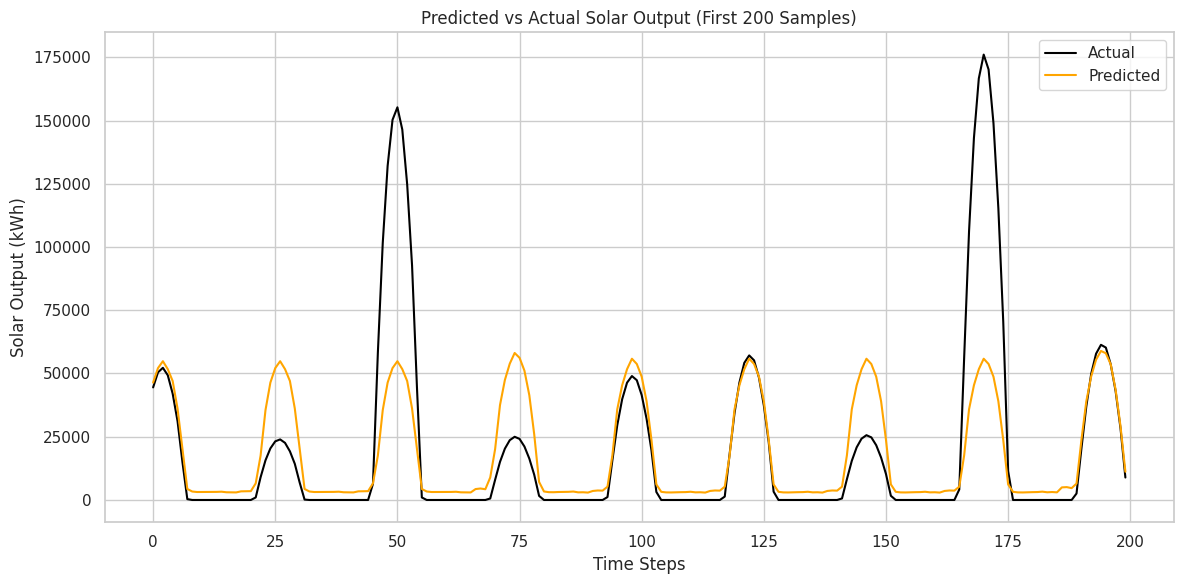

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_excel('/content/Merged_Solar_Weather_Data.xlsx')

features = ['Hour', 'ALLSKY_KT', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN',
            'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DIFF', 'SZA', 'QV2M',
            'PRECTOTCORR', 'RH2M', 'T2M', 'Solar_Output_kWh']
df = df[features].interpolate().ffill().bfill()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=features)

class SequenceDataset(Dataset):
    def __init__(self, data, input_len=24, output_len=1):
        self.input_len = input_len
        self.output_len = output_len
        self.X = []
        self.y = []
        for i in range(len(data) - input_len - output_len):
            x_seq = data[i:i+input_len, :-1]
            y_seq = data[i+input_len:i+input_len+output_len, -1]
            self.X.append(x_seq)
            self.y.append(y_seq)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

input_len = 24
output_len = 1
data = scaled_df.values

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

train_dataset = SequenceDataset(train_data, input_len, output_len)
test_dataset = SequenceDataset(test_data, input_len, output_len)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CNNInformer(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2):
        super(CNNInformer, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_dim, d_model, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(d_model, d_model, kernel_size=3, padding=1)
        )
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.cnn(x)
        x = x.permute(2, 0, 1)
        x = self.transformer(x)
        x = x[-1]
        out = self.fc(x)
        return out

input_dim = data.shape[1] - 1
model = CNNInformer(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_model(model, train_loader, test_loader, epochs=100):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, y in train_loader:
            optimizer.zero_grad()
            output = model(X).squeeze()
            loss = criterion(output, y.squeeze())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X, y in test_loader:
                output = model(X).squeeze()
                loss = criterion(output, y.squeeze())
                test_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Test MSE: {test_loss/len(test_loader):.4f}")

train_model(model, train_loader, test_loader, epochs=100)

def evaluate(model, loader):
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for X, y in loader:
            output = model(X).squeeze()
            preds.append(output.numpy())
            actuals.append(y.squeeze().numpy())
    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    mse = np.mean((preds - actuals) ** 2)
    mae = mean_absolute_error(actuals, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, preds)

    return mse, mae, rmse, r2, preds, actuals

mse, mae, rmse, r2, preds, actuals = evaluate(model, test_loader)

target_scaler = MinMaxScaler()
target_scaler.fit(df[['Solar_Output_kWh']])
preds_rescaled = target_scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
actuals_rescaled = target_scaler.inverse_transform(actuals.reshape(-1, 1)).flatten()

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(actuals_rescaled[:200], label='Actual', color='black')
plt.plot(preds_rescaled[:200], label='Predicted', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Solar Output (kWh)')
plt.title('Predicted vs Actual Solar Output (First 200 Samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**GRU**

Epoch 1/100, Train Loss: 0.0098, Test MSE: 0.0100
Epoch 2/100, Train Loss: 0.0073, Test MSE: 0.0086
Epoch 3/100, Train Loss: 0.0070, Test MSE: 0.0087
Epoch 4/100, Train Loss: 0.0068, Test MSE: 0.0090
Epoch 5/100, Train Loss: 0.0067, Test MSE: 0.0089
Epoch 6/100, Train Loss: 0.0067, Test MSE: 0.0097
Epoch 7/100, Train Loss: 0.0067, Test MSE: 0.0086
Epoch 8/100, Train Loss: 0.0066, Test MSE: 0.0084
Epoch 9/100, Train Loss: 0.0065, Test MSE: 0.0095
Epoch 10/100, Train Loss: 0.0067, Test MSE: 0.0094
Epoch 11/100, Train Loss: 0.0067, Test MSE: 0.0087
Epoch 12/100, Train Loss: 0.0065, Test MSE: 0.0093
Epoch 13/100, Train Loss: 0.0067, Test MSE: 0.0091
Epoch 14/100, Train Loss: 0.0065, Test MSE: 0.0082
Epoch 15/100, Train Loss: 0.0065, Test MSE: 0.0097
Epoch 16/100, Train Loss: 0.0064, Test MSE: 0.0087
Epoch 17/100, Train Loss: 0.0067, Test MSE: 0.0083
Epoch 18/100, Train Loss: 0.0066, Test MSE: 0.0095
Epoch 19/100, Train Loss: 0.0064, Test MSE: 0.0089
Epoch 20/100, Train Loss: 0.0065, Test M

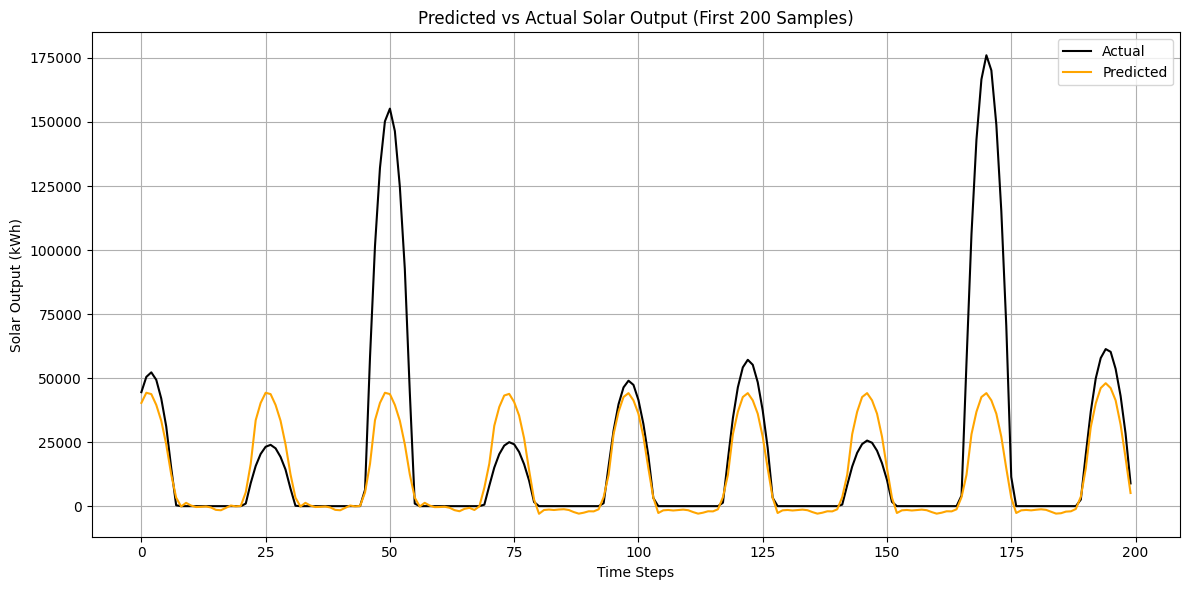

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_excel('/content/Merged_Solar_Weather_Data.xlsx')

features = ['Hour', 'ALLSKY_KT', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN',
            'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DIFF', 'SZA', 'QV2M',
            'PRECTOTCORR', 'RH2M', 'T2M', 'Solar_Output_kWh']

df = df[features].interpolate().ffill().bfill()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=features)

class SequenceDataset(Dataset):
    def __init__(self, data, input_len=24, output_len=1):
        self.input_len = input_len
        self.output_len = output_len
        self.X = []
        self.y = []
        for i in range(len(data) - input_len - output_len):
            x_seq = data[i:i+input_len, :-1]
            y_seq = data[i+input_len:i+input_len+output_len, -1]
            self.X.append(x_seq)
            self.y.append(y_seq)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)
input_len = 24
output_len = 1
data = scaled_df.values

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

train_dataset = SequenceDataset(train_data, input_len, output_len)
test_dataset = SequenceDataset(test_data, input_len, output_len)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2, output_dim=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

input_dim = data.shape[1] - 1
model = GRUModel(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
def train_model(model, train_loader, test_loader, epochs=20):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, y in train_loader:
            optimizer.zero_grad()
            output = model(X).squeeze()
            loss = criterion(output, y.squeeze())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X, y in test_loader:
                output = model(X).squeeze()
                loss = criterion(output, y.squeeze())
                test_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Test MSE: {test_loss/len(test_loader):.4f}")

train_model(model, train_loader, test_loader, epochs=100)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, loader):
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for X, y in loader:
            output = model(X).squeeze()
            preds.append(output.numpy())
            actuals.append(y.squeeze().numpy())
    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    return preds, actuals
preds, actuals = evaluate(model, test_loader)
target_scaler = MinMaxScaler()
target_scaler.fit(df[['Solar_Output_kWh']])
preds_rescaled = target_scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
actuals_rescaled = target_scaler.inverse_transform(actuals.reshape(-1, 1)).flatten()
mae = mean_absolute_error(actuals_rescaled, preds_rescaled)
rmse = np.sqrt(mean_squared_error(actuals_rescaled, preds_rescaled))
r2 = r2_score(actuals_rescaled, preds_rescaled)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(actuals_rescaled[:200], label='Actual', color='black')
plt.plot(preds_rescaled[:200], label='Predicted', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Solar Output (kWh)')
plt.title('Predicted vs Actual Solar Output (First 200 Samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Data Visualization**

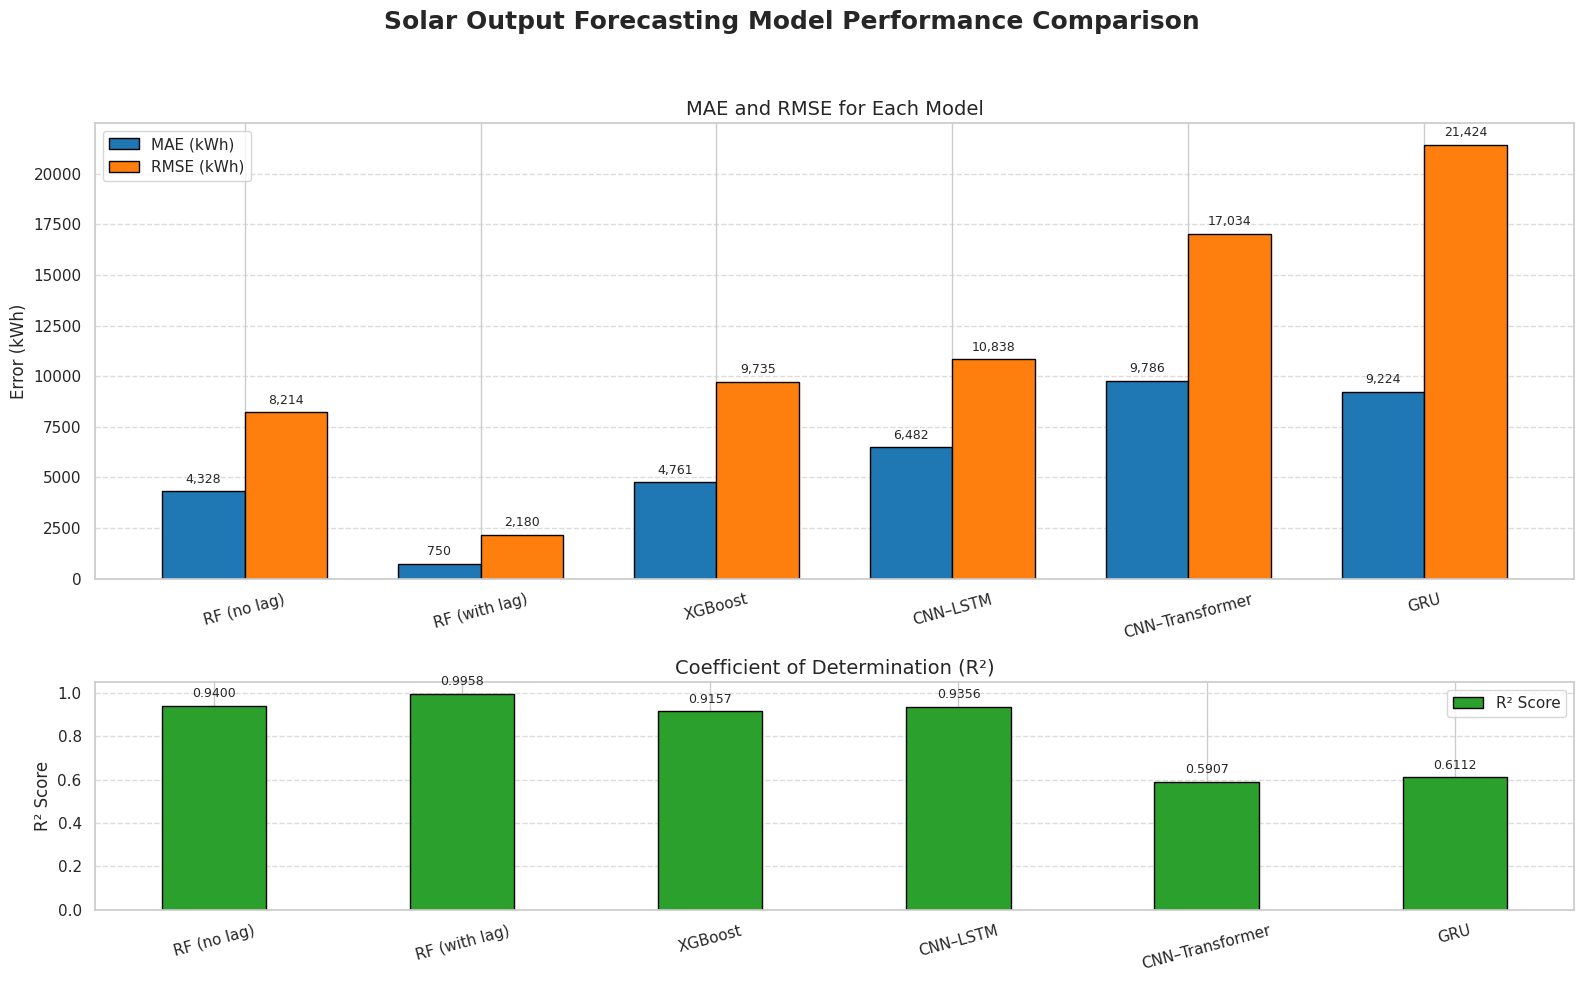

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

models = [
    'RF (no lag)',
    'RF (with lag)',
    'XGBoost',
    'CNN–LSTM',
    'CNN–Transformer',
    'GRU'
]

mae = [4328.11, 750.08, 4760.61, 6482.19, 9786.48, 9224.41]
rmse = [8213.93, 2180.04, 9734.68, 10837.61, 17034.15, 21424.35]
r2 = [0.9400, 0.9958, 0.9157, 0.9356, 0.5907, 0.6112]

x = np.arange(len(models))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Solar Output Forecasting Model Performance Comparison', fontsize=18, weight='bold')

bar_mae = ax1.bar(x - width/2, mae, width, label='MAE (kWh)', color='#1f77b4', edgecolor='black')
bar_rmse = ax1.bar(x + width/2, rmse, width, label='RMSE (kWh)', color='#ff7f0e', edgecolor='black')

ax1.set_ylabel('Error (kWh)', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11, rotation=15)
ax1.set_title('MAE and RMSE for Each Model', fontsize=14)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

def annotate(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

annotate(ax1, bar_mae)
annotate(ax1, bar_rmse)
bar_r2 = ax2.bar(x, r2, width*1.2, label='R² Score', color='#2ca02c', edgecolor='black')

ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_ylim(0, 1.05)
ax2.set_xticks(x)
ax2.set_xticklabels(models, fontsize=11, rotation=15)
ax2.set_title('Coefficient of Determination (R²)', fontsize=14)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bar_r2:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 4),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


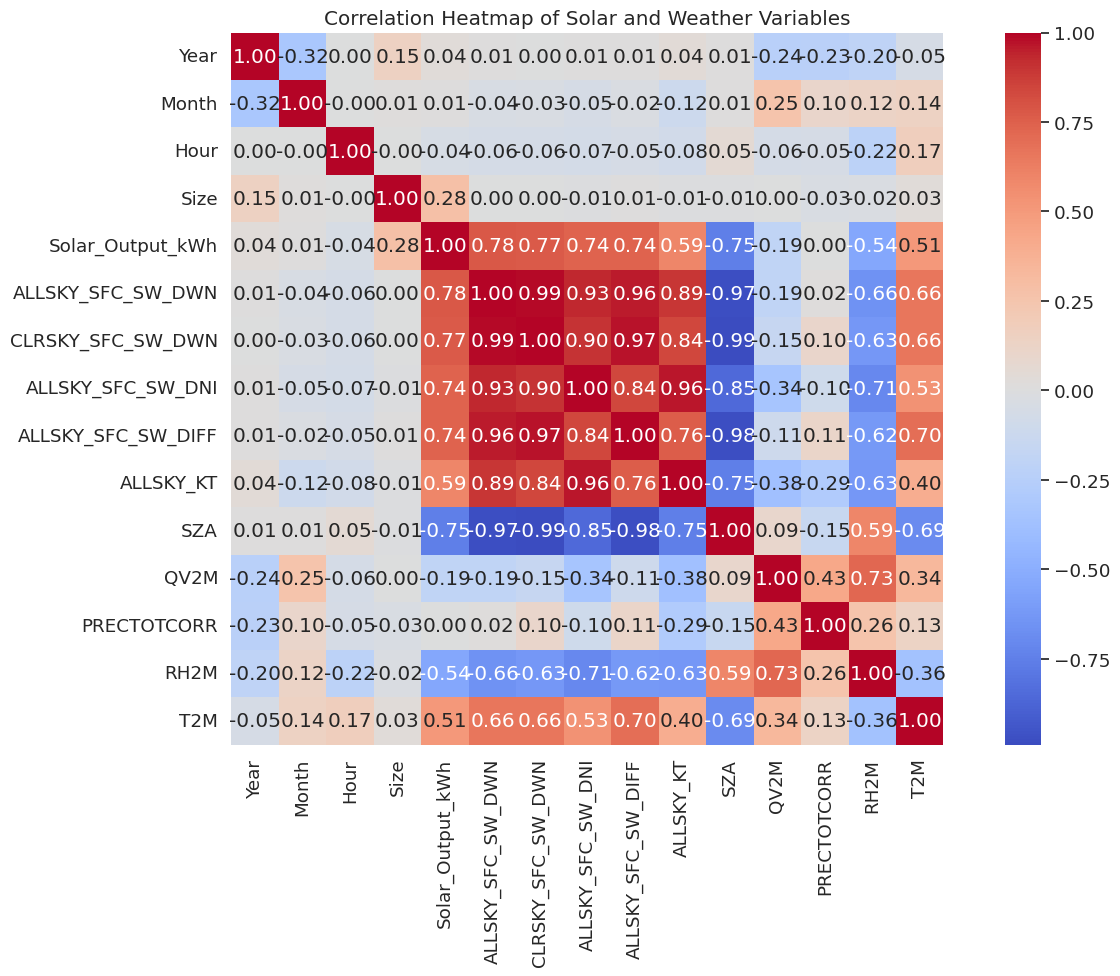

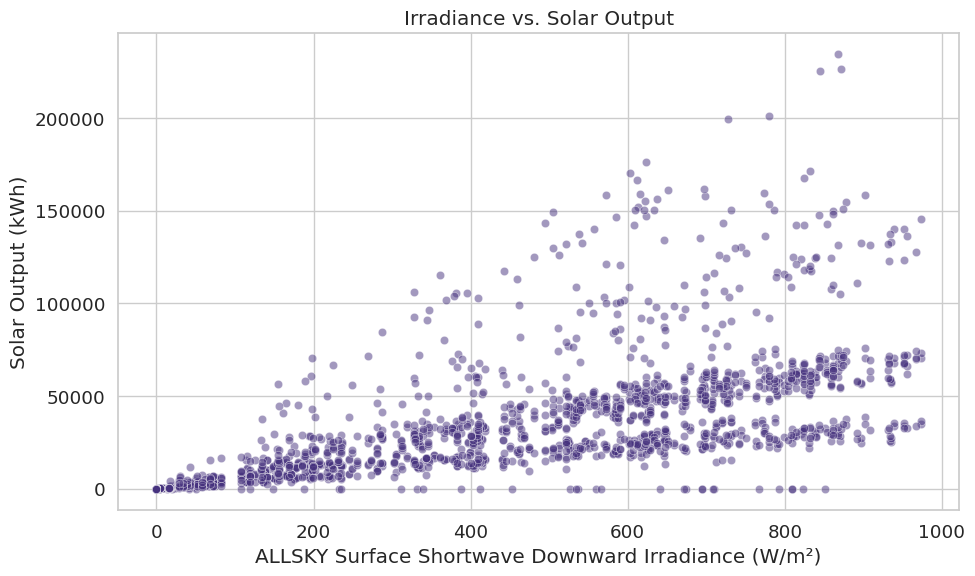

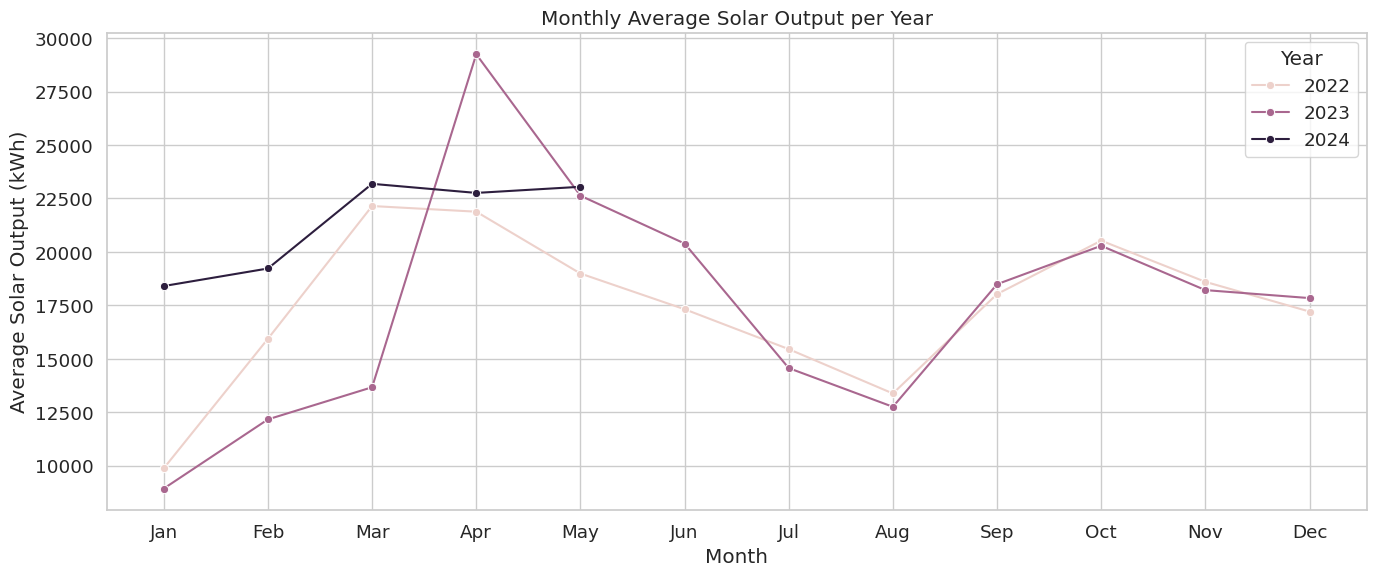

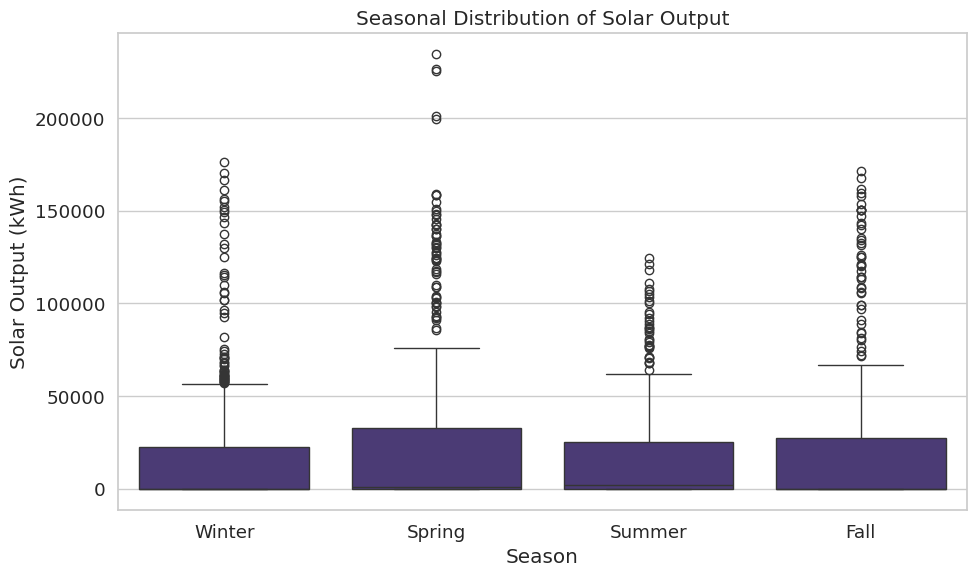

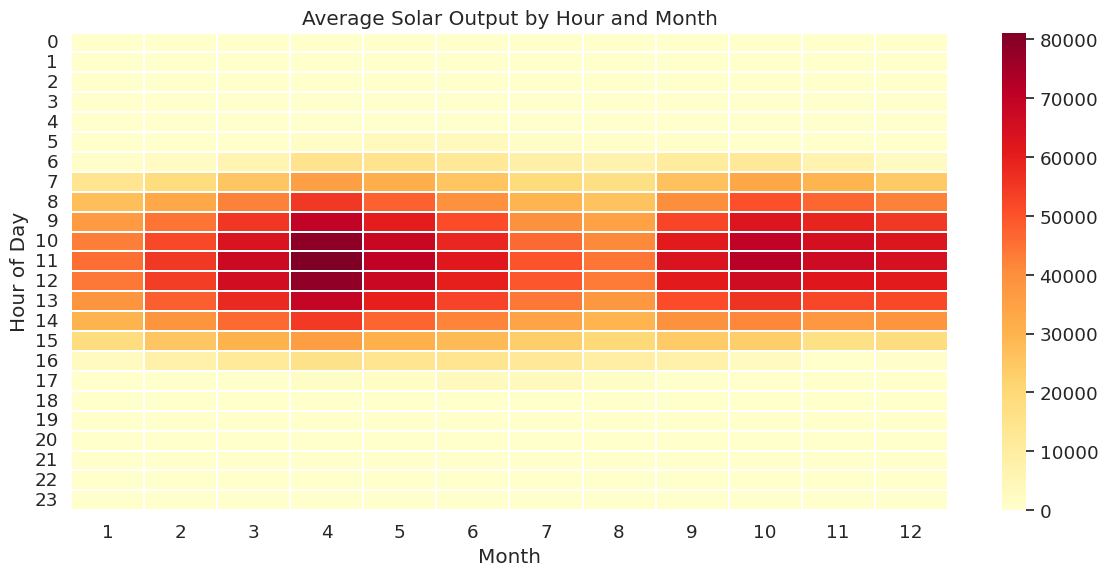

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/Merged_Solar_Weather_Data.xlsx")

sns.set(style="whitegrid", palette="viridis", font_scale=1.2)

df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Solar and Weather Variables")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ALLSKY_SFC_SW_DWN', y='Solar_Output_kWh', alpha=0.5)
plt.title('Irradiance vs. Solar Output')
plt.xlabel('ALLSKY Surface Shortwave Downward Irradiance (W/m²)')
plt.ylabel('Solar Output (kWh)')
plt.tight_layout()
plt.savefig("irradiance_vs_output.png")
plt.show()

monthly_avg = df.groupby(['Year', 'Month'])['Solar_Output_kWh'].mean().reset_index()
monthly_avg['Month_str'] = monthly_avg['Month'].apply(lambda x: pd.to_datetime(f"2024-{x}-01").strftime('%b'))

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Solar_Output_kWh', hue='Year', marker="o")
plt.title('Monthly Average Solar Output per Year')
plt.xlabel('Month')
plt.ylabel('Average Solar Output (kWh)')
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.savefig("monthly_trend.png")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Solar_Output_kWh', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title("Seasonal Distribution of Solar Output")
plt.ylabel("Solar Output (kWh)")
plt.tight_layout()
plt.savefig("seasonal_boxplot.png")
plt.show()
pivot_table = df.pivot_table(index='Hour', columns='Month', values='Solar_Output_kWh', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.3, linecolor='white', annot=False)
plt.title("Average Solar Output by Hour and Month")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.savefig("hourly_heatmap.png")
plt.show()
